In [3]:
# lib imports
import os
import time
import tqdm
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import json
import joblib
import sklearn
from sklearn.impute import SimpleImputer
from scipy.stats.contingency import crosstab
import argparse
from sklearn import preprocessing

# custom imports
sys.path.append(os.path.expanduser('~'))
sys.path.append(os.getcwd())
from functions.load_model import load_tolist
import functions.process as proc
from functions.io import setup_logger, makedir
from functions.read_write import NpIntEncoder
from functions import FeatureEngine
from functions.plots_prediction import ethogram_plotter, CLtrajectory_plotter, transition_plotter
import functions.algebra as al

In [5]:
# %% SETTINGS
# set invalid (division by zero error) to ignore
np.seterr(invalid='ignore')
date = time.strftime("%Y%m%d")
datestr = time.strftime("%Y%m%d-%HH%MM")
newline = '\n'
sklearn.set_config(transform_output="pandas")


# %% Configuration
config = yaml.safe_load(open("config.yml", "r"))

config_batch_path = "config_batch.yml"
config_batch = yaml.safe_load(open(config_batch_path, "r"))
# %% INPUT
list_inpath_pattern = config_batch['Experiments'][config_batch['Settings']['run']]['conditions']

# recording
fps = config['settings']['fps']

# path
inpath = config['path']['PharaGlow data']
inpath_with_subfolders = config['path']['with subfolders']

# coloring and labels
cluster_color = config['cluster_color']
cluster_label = config['cluster_labels']
skip_already = config['settings']['skip_already']

for inpath_pattern in list_inpath_pattern:
    # %% I/O
    # create list of inpath from folders in inpath that folder names contain inpath_pattern
    if inpath_with_subfolders:
        new_inpath = [os.path.join(inpath, sub) for sub in os.listdir(inpath) if inpath_pattern in sub]
    else:
        new_inpath = [inpath]
    outpath = f'/gpfs/soma_fs/home/boeger/PpaPred/temp/{inpath_pattern}'

    base_outpath = makedir(outpath)
    outpath = []
    for p in new_inpath:
        in_folder = os.path.basename(p)
        outpath.append(makedir(os.path.abspath(os.path.join(base_outpath,in_folder))))
    
    if True:
        XYs, CLines  = FeatureEngine.run(new_inpath, 
                                     outpath,
                                     return_XYCLine = True, 
                                     skip_engine = False, 
                                     skip_already=False, 
                                     out_fn_suffix='features',
                                     inpath_with_subfolders=inpath_with_subfolders)

  0%|          | 0/118 [00:00<?, ?it/s]

feature calculation for L147_240523_L147_results_1.json_labeldata.csv
Area larger than threshold, collision assumed in [range(7972, 7991), range(7992, 7996)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 7972)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([6569, 6606, 6607, 6609]),)
Ffill-Interpolation of nan frames


  1%|          | 1/118 [00:03<06:52,  3.53s/it]



feature calculation for L147_240523_L147_results_75.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2483, 2484), range(2485, 2487), range(2496, 2497), range(2500, 2501)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 284)
split 1, range: (317, 351)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (363, 491)
split 3, range: (495, 853)
split 4, range: (854, 1931)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([777, 778]),)
split 5, range: (1943, 2304)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (2308, 2477)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(284, 317) (over 1 sec long)


  2%|▏         | 2/118 [00:05<04:49,  2.50s/it]



feature calculation for L147_240523_L147bis_results_151.json_labeldata.csv
Area larger than threshold, collision assumed in [range(4216, 4217), range(4222, 4223)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (18, 49)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (54, 324)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (356, 496)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (509, 4216)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([3403, 3404, 3693, 3694]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 4, range: (4223, 8076)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1705, 1707, 1710, 1873, 1909, 1919, 1920, 1927, 1929, 1931, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1991, 1994, 1995, 2159, 2411,
       2412, 2413, 2414, 2415, 2416, 2419, 2420, 2447, 2479, 2491, 2492,
       2493, 2494, 2495, 2496]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(324, 356) (over 1 sec long)


  3%|▎         | 3/118 [00:09<05:59,  3.13s/it]



feature calculation for L147_240523_L147_results_49.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1869)


  3%|▎         | 4/118 [00:10<04:19,  2.27s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(1869, 1938) (over 1 sec long)


feature calculation for L147_240523_L147_results_29.json_labeldata.csv
Area larger than threshold, collision assumed in [range(142, 143), range(217, 238), range(531, 541), range(1981, 2003)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (45, 142)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (154, 192)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([15, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37]),)
split 2, range: (238, 407)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (452, 497)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([38]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (544, 730)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (754, 854)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 6, range: (880, 1726)
split 7, range: (1733, 1962)
split 8, range: (2037, 2151)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 45) (over 1 sec long)
Exempted from interpolation: range(192, 238) (over 1 sec long)
Exempted from interpolation: range(407, 452) (over 1 sec long)
Exempted from interpolation: range(497, 544) (over 1 sec long)
Exempted from interpolation: range(1962, 2037) (over 1 sec long)


  4%|▍         | 5/118 [00:11<03:53,  2.07s/it]



feature calculation for L147_240523_L147_results_41.json_labeldata.csv
Area larger than threshold, collision assumed in [range(56, 92), range(633, 635), range(648, 649), range(655, 674), range(3394, 3481), range(3490, 3492)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (92, 181)
split 1, range: (184, 226)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (257, 633)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([370, 374]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (693, 1103)
split 4, range: (1123, 3029)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 161,  164,  165,  166,  167, 1056, 1094, 1095, 1096, 1097, 1098]),)
split 5, range: (3100, 3133)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([32]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (3141, 3394)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 92) (over 1 sec long)
Exempted from interpolation: range(226, 257) (over 1 sec long)
Exempted from interpolation: range(633, 693) (over 1 sec long)
Exempted from interpolation: range(3029, 3100) (over 1 sec long)
Exempted from interpolation: range(3394, 3492) (over 1 sec long)


  5%|▌         | 6/118 [00:13<03:51,  2.07s/it]



feature calculation for L147_240523_L147_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([   75,   105, 11419, 11422, 11423, 11424, 11425, 11429, 11430,
       11441, 11444, 11445, 11446, 11447]),)
Ffill-Interpolation of nan frames


  6%|▌         | 7/118 [00:21<07:12,  3.90s/it]



feature calculation for L147_240523_L147_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [range(9035, 9040), range(9041, 9042), range(9061, 9066), range(14853, 14860), range(14863, 14864), range(14895, 14899), range(14954, 14970)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 8038)
split 1, range: (8039, 8662)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([620, 621, 622]),)
split 2, range: (8663, 9035)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (9066, 14853)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2906, 2907, 2908, 2909, 2910, 2911, 2989, 3037, 3038, 3039, 3480,
       3481, 3482, 3483, 3484, 3485, 3486, 3487, 3490, 3497, 3854, 3866,
       3867, 3868, 3871, 3872, 3877, 5062, 5063, 

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(9035, 9066) (over 1 sec long)


  7%|▋         | 8/118 [00:29<09:43,  5.31s/it]



feature calculation for L147_240523_L147_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 7046,  7047,  7048, ..., 17996, 17997, 17998]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


  8%|▊         | 9/118 [00:37<10:54,  6.01s/it]



feature calculation for L147_240523_L147_results_37.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1805)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1246, 1247, 1261, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1278,
       1280]),)


  8%|▊         | 10/118 [00:38<08:00,  4.45s/it]

Ffill-Interpolation of nan frames


feature calculation for L147_240523_L147bis_results_166.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 6517)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 372,  373,  374, ..., 6514, 6515, 6516]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


  9%|▉         | 11/118 [00:41<06:59,  3.92s/it]



feature calculation for L147_240523_L147_results_9.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3889)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 306,  312,  313,  317, 2758, 2759]),)
Ffill-Interpolation of nan frames


 10%|█         | 12/118 [00:42<05:46,  3.27s/it]



feature calculation for L147_240523_L147_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 4383)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 164, 1584, 1800]),)
Ffill-Interpolation of nan frames


 11%|█         | 13/118 [00:44<05:02,  2.88s/it]



feature calculation for L147_240523_L147_results_67.json_labeldata.csv
Area larger than threshold, collision assumed in [range(63, 64), range(65, 66), range(76, 77), range(304, 306), range(325, 334), range(646, 647), range(890, 894), range(1234, 1246), range(1251, 1283), range(1374, 1376), range(1377, 1378), range(1379, 1394), range(1397, 1398), range(1405, 1413), range(1414, 1415), range(1422, 1434)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 63)
split 1, range: (77, 304)
split 2, range: (334, 646)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (647, 890)
split 4, range: (894, 967)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 5, range: (1021, 1099)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (1100, 1167)
split 7, range: (1168, 1234)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 8, range: (1287, 1374)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 9, range: (1474, 1544)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 10, range: (1545, 1620)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 11, range: (1629, 2169)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(967, 1021) (over 1 sec long)
Exempted from interpolation: range(1234, 1287) (over 1 sec long)
Exempted from interpolation: range(1374, 1474) (over 1 sec long)


 12%|█▏        | 14/118 [00:46<04:30,  2.60s/it]



feature calculation for L147_240523_L147_results_57.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 8343)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2778, 2780, 2784, 2818, 5009, 5044]),)
Ffill-Interpolation of nan frames


 13%|█▎        | 15/118 [00:50<04:58,  2.90s/it]



feature calculation for L147_240523_L147_results_42.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1352, 1353)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1087)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 1, range: (1125, 1352)
split 2, range: (1353, 2349)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1087, 1125) (over 1 sec long)


 14%|█▎        | 16/118 [00:51<04:06,  2.42s/it]



feature calculation for L147_240523_L147bis_results_153.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1641)
split 1, range: (1665, 2898)
Ffill-Interpolation of nan frames


 14%|█▍        | 17/118 [00:53<03:36,  2.14s/it]



feature calculation for L147_240523_L147_results_8.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 15221)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 3788,  3789,  3792, ..., 15218, 15219, 15220]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


 15%|█▌        | 18/118 [00:59<05:40,  3.40s/it]



feature calculation for L147_240523_L147_results_51.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (2, 10002)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([650, 997]),)
Ffill-Interpolation of nan frames


 16%|█▌        | 19/118 [01:03<06:03,  3.68s/it]



feature calculation for L147_240417_L147_results_43.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3150)
split 1, range: (3159, 3208)
Ffill-Interpolation of nan frames


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 17%|█▋        | 20/118 [01:05<04:56,  3.03s/it]



feature calculation for L147_240417_L147_results_1.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  164,  2141,  2142,  3512,  3553, 16576]),)
Ffill-Interpolation of nan frames


 18%|█▊        | 21/118 [01:13<07:07,  4.41s/it]



feature calculation for L147_240417_L147_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Ffill-Interpolation of nan frames


 19%|█▊        | 22/118 [01:20<08:35,  5.37s/it]



feature calculation for L147_240417_L147_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 61)
split 1, range: (119, 895)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([335, 336, 337, 341, 342, 343]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (941, 1776)
split 3, range: (1791, 1879)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([82, 83]),)
split 4, range: (1887, 7707)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(61, 119) (over 1 sec long)
Exempted from interpolation: range(895, 941) (over 1 sec long)


 19%|█▉        | 23/118 [01:24<07:40,  4.85s/it]



feature calculation for L147_240417_L147_results_17.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1882)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1436, 1439]),)


 20%|██        | 24/118 [01:25<05:46,  3.68s/it]

Ffill-Interpolation of nan frames


feature calculation for L147_240417_L147_results_58.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2613)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 722,  723,  724, ..., 2610, 2611, 2612]),)
Ffill-Interpolation of nan frames


 21%|██        | 25/118 [01:26<04:33,  2.94s/it]



feature calculation for L147_240510_L147_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1106)
split 1, range: (1131, 3180)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2035, 2041, 2045, 2046]),)
split 2, range: (3182, 3276)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([10, 22, 28, 29, 30, 31, 58, 59, 60, 61, 62, 63, 64, 65, 66]),)
split 3, range: (3277, 17984)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([   19,   176,   177,   178,   179,   180,   181,   182,   183,
         184,   185,   186,   187,   188,   189,   190,   191,   369,
         370,   371,   372,   373,   380,   381,   382,   383,   391,
         392,   393,   394,   395,   396,  3895,  6226,  6227,  6228,
        6229, 

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames


 22%|██▏       | 26/118 [01:34<06:44,  4.40s/it]



feature calculation for L147_240510_L147_results_13.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1777)
split 1, range: (1794, 3477)
split 2, range: (3488, 5081)
split 3, range: (5083, 5514)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([344, 386, 387, 388, 389]),)
Ffill-Interpolation of nan frames


 23%|██▎       | 27/118 [01:36<05:53,  3.88s/it]



feature calculation for L147_240510_L147_results_6.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3594)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1858, 1859, 1860, ..., 3591, 3592, 3593]),)
Ffill-Interpolation of nan frames


 24%|██▎       | 28/118 [01:38<04:50,  3.23s/it]



feature calculation for L147_240510_L147_results_7.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 7423)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([3251, 3252, 3253, 3254, 3256, 3257, 3261, 3263, 3265]),)
Ffill-Interpolation of nan frames


 25%|██▍       | 29/118 [01:41<04:46,  3.22s/it]



feature calculation for L147_240510_L147_results_35.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 5830)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([5496, 5497, 5498, 5499, 5500, 5501, 5502, 5503, 5504, 5505, 5506,
       5507, 5508, 5509, 5510, 5511, 5512, 5513, 5514, 5515, 5516, 5517,
       5518, 5519, 5520, 5521, 5522, 5523, 5524, 5525, 5526, 5527, 5528,
       5529, 5530, 5531, 5532, 5533, 5534, 5535, 5536, 5537, 5538, 5539,
       5540, 5541, 5542, 5543, 5544, 5545, 5546, 5547, 5548, 5549, 5550,
       5551, 5552, 5553, 5554, 5555, 5556, 5557, 5558, 5559, 5560, 5561,
       5562, 5563, 5564, 5565, 5566, 5567, 5568, 5569, 5570, 5571, 5572,
       5573, 5574, 5575, 5576, 5577, 5578, 5579, 5580, 5581, 5582, 5583,
       5584, 5585, 5586, 5587, 5588, 5589, 5590, 5591, 5592, 5593

 25%|██▌       | 30/118 [01:44<04:25,  3.01s/it]



feature calculation for L147_240510_L147_results_25.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 6924)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([4938]),)
Ffill-Interpolation of nan frames


 26%|██▋       | 31/118 [01:47<04:24,  3.04s/it]



feature calculation for L147_240510_L147_results_31.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (14, 3117)
Ffill-Interpolation of nan frames


 27%|██▋       | 32/118 [01:49<03:42,  2.59s/it]



feature calculation for L147_240506_L147_results_283.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2947)
Ffill-Interpolation of nan frames


 28%|██▊       | 33/118 [01:50<03:07,  2.21s/it]



feature calculation for L147_240506_L147_results_281.json_labeldata.csv
Area larger than threshold, collision assumed in [range(25, 26)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (26, 4085)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 199, 1172, 1173, ..., 4056, 4057, 4058]),)
Ffill-Interpolation of nan frames


 29%|██▉       | 34/118 [01:52<02:56,  2.10s/it]



feature calculation for L147_240506_L147_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1, 3), range(12, 18), range(20, 21), range(23, 26), range(28, 31), range(32, 39), range(42, 85), range(93, 96), range(103, 105), range(106, 108), range(109, 110), range(111, 112), range(113, 131), range(132, 133), range(136, 142), range(143, 187), range(190, 191), range(192, 199), range(202, 205), range(207, 242), range(244, 245), range(246, 247), range(249, 254), range(255, 256), range(267, 268), range(269, 277), range(278, 280), range(281, 284), range(286, 287), range(289, 315), range(317, 329), range(330, 334), range(335, 336), range(341, 347), range(348, 349), range(357, 358), range(359, 369), range(370, 371), range(375, 384), range(398, 422), range(423, 424), range(426, 427), range(428, 429), range(431, 432)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (432, 2010)
sp

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 432) (over 1 sec long)


 30%|██▉       | 35/118 [01:53<02:32,  1.84s/it]



feature calculation for L147_240506_L147_results_225.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (4, 696)
split 1, range: (701, 7409)
Ffill-Interpolation of nan frames


 31%|███       | 36/118 [01:56<03:09,  2.31s/it]



feature calculation for L147_240506_L147_results_212.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (22, 308)
split 1, range: (309, 396)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (398, 7828)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834,
       1835, 1836, 1837, 1838, 1839]),)
Ffill-Interpolation of nan frames


 31%|███▏      | 37/118 [02:00<03:37,  2.69s/it]



feature calculation for L147_240718_L147_results_116.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (9, 224)
split 1, range: (225, 1236)
split 2, range: (1259, 4208)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([111, 678, 690, 694, 695, 696, 697, 704, 710, 711]),)
Ffill-Interpolation of nan frames


 32%|███▏      | 38/118 [02:02<03:19,  2.49s/it]



feature calculation for L147_240718_L147_results_117.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (9, 202)
split 1, range: (236, 922)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([626]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (968, 1403)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (1404, 4208)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(202, 236) (over 1 sec long)
Exempted from interpolation: range(922, 968) (over 1 sec long)


 33%|███▎      | 39/118 [02:04<03:10,  2.41s/it]



feature calculation for L147_240718_L147_results_13.json_labeldata.csv
Area larger than threshold, collision assumed in [range(3202, 3203), range(3309, 3310), range(3323, 3324), range(3327, 3328), range(3332, 3333), range(3337, 3338), range(3339, 3342), range(3346, 3347), range(3352, 3354), range(3356, 3357), range(3358, 3359), range(3363, 3364), range(3369, 3372), range(3380, 3382), range(3383, 3384), range(3385, 3386), range(3549, 3550), range(3604, 3605), range(3614, 3615), range(3629, 3630), range(3640, 3642), range(3659, 3663), range(3730, 3731), range(3734, 3735), range(3736, 3739), range(3743, 3747), range(3753, 3754), range(3755, 3756), range(3761, 3762), range(3766, 3767), range(3774, 3775), range(3778, 3780), range(3800, 3801), range(3973, 3974), range(3992, 3993), range(3995, 3996), range(3997, 3998), range(4002, 4004), range(4005, 4008), range(4009, 4014), range(4015, 4016), range(4024, 4025), range(4028, 4031), range(4033, 4034), range(4035, 4036), range(4037, 4040), ran

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (3550, 3604)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (3663, 3730)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1]),)
split 5, range: (3801, 3973)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 6, range: (4628, 11445)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(3309, 3386) (over 1 sec long)
Exempted from interpolation: range(3604, 3663) (over 1 sec long)
Exempted from interpolation: range(3730, 3801) (over 1 sec long)
Exempted from interpolation: range(3973, 4628) (over 1 sec long)
Exempted from interpolation: range(11445, 11534) (over 1 sec long)


 34%|███▍      | 40/118 [02:09<04:13,  3.25s/it]



feature calculation for L147_240718_L147_results_10.json_labeldata.csv
Area larger than threshold, collision assumed in [range(3163, 3164), range(3165, 3166), range(3167, 3168), range(3171, 3173), range(3183, 3185), range(3189, 3192), range(3195, 3201), range(3203, 3205), range(3206, 3215), range(3216, 3220), range(3221, 3241), range(3242, 3260), range(3261, 3268), range(3272, 3275), range(3292, 3293), range(3294, 3295), range(3299, 3308), range(3315, 3316), range(3319, 3320), range(3331, 3430), range(3431, 3502), range(3508, 3511), range(3512, 3514), range(3515, 3516), range(3518, 3519), range(3522, 3530), range(3531, 3538), range(3539, 3548), range(3549, 3550), range(3551, 3557), range(3558, 3567), range(3568, 3570), range(3571, 3574), range(3576, 3595), range(3596, 3643), range(3644, 3653), range(3654, 3657), range(3658, 3659), range(3660, 3667), range(3669, 3675), range(3676, 3677), range(3679, 3682), range(3684, 3685), range(3686, 3687), range(3688, 3690), range(3691, 3692), ran

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (10416, 11409)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(3163, 4646) (over 1 sec long)
Exempted from interpolation: range(10363, 10416) (over 1 sec long)
Exempted from interpolation: range(11409, 11487) (over 1 sec long)


 35%|███▍      | 41/118 [02:14<04:51,  3.79s/it]



feature calculation for L147_240718_L147_results_133.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (36, 1028)
split 1, range: (1031, 2263)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 36) (over 1 sec long)


 36%|███▌      | 42/118 [02:16<03:51,  3.04s/it]



feature calculation for L147_240718_L147_results_17.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1879)
split 1, range: (1899, 2157)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


 36%|███▋      | 43/118 [02:17<03:06,  2.48s/it]



feature calculation for L147_240718_L147_results_128.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (25, 109)
split 1, range: (130, 633)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (634, 2919)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
       111, 742, 743, 744]),)
Ffill-Interpolation of nan frames


 37%|███▋      | 44/118 [02:18<02:42,  2.20s/it]



feature calculation for L147_240718_L147_results_12.json_labeldata.csv
Area larger than threshold, collision assumed in [range(3173, 3174), range(3193, 3195), range(3202, 3205), range(3206, 3207), range(3218, 3219), range(3225, 3226), range(3236, 3237), range(3297, 3298), range(3305, 3306), range(3309, 3310), range(3323, 3324), range(3327, 3328), range(3332, 3334), range(3337, 3338), range(3339, 3343), range(3346, 3347), range(3349, 3350), range(3352, 3354), range(3355, 3357), range(3358, 3359), range(3362, 3364), range(3366, 3367), range(3368, 3372), range(3373, 3374), range(3375, 3382), range(3383, 3384), range(3385, 3386), range(3387, 3388), range(3390, 3394), range(3395, 3396), range(3397, 3398), range(3399, 3401), range(3403, 3409), range(3411, 3412), range(3414, 3415), range(3417, 3420), range(3427, 3430), range(3445, 3446), range(3447, 3448), range(3452, 3453), range(3542, 3543), range(3546, 3547), range(3549, 3551), range(3554, 3555), range(3575, 3576), range(3582, 3583), ran

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 4, range: (4630, 9738)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(3173, 3237) (over 1 sec long)
Exempted from interpolation: range(3297, 3453) (over 1 sec long)
Exempted from interpolation: range(3542, 3814) (over 1 sec long)
Exempted from interpolation: range(3973, 4630) (over 1 sec long)


 38%|███▊      | 45/118 [02:23<03:26,  2.83s/it]



feature calculation for L147_240718_L147_results_7.json_labeldata.csv
Area larger than threshold, collision assumed in [range(3189, 3190), range(3193, 3194), range(3195, 3196), range(3197, 3198), range(3204, 3208), range(3210, 3213), range(3214, 3218), range(3226, 3227), range(3228, 3231), range(3233, 3234), range(3244, 3246), range(3260, 3261), range(3263, 3264), range(3297, 3298), range(3303, 3306), range(3313, 3314), range(3317, 3318), range(3330, 3333), range(3335, 3336), range(3340, 3342), range(3345, 3346), range(3347, 3351), range(3354, 3355), range(3357, 3358), range(3360, 3361), range(3363, 3365), range(3366, 3367), range(3369, 3372), range(3374, 3375), range(3376, 3380), range(3386, 3390), range(3391, 3392), range(3393, 3394), range(3395, 3396), range(3399, 3401), range(3402, 3417), range(3418, 3422), range(3424, 3425), range(3426, 3427), range(3430, 3431), range(3433, 3440), range(3442, 3443), range(3450, 3452), range(3467, 3468), range(3508, 3509), range(3516, 3517), rang

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 4, range: (3921, 3979)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (4636, 10194)
split 6, range: (10197, 11456)
split 7, range: (11493, 11552)
split 8, range: (11601, 11816)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 55,  56,  57, 126, 127, 128]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(3189, 3264) (over 1 sec long)
Exempted from interpolation: range(3297, 3468) (over 1 sec long)
Exempted from interpolation: range(3508, 3824) (over 1 sec long)
Exempted from interpolation: range(3979, 4636) (over 1 sec long)
Exempted from interpolation: range(11456, 11493) (over 1 sec long)
Exempted from interpolation: range(11552, 11601) (over 1 sec long)


 39%|███▉      | 46/118 [02:28<04:21,  3.64s/it]



feature calculation for L147_240718_L147_results_46.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1851, 1852), range(1853, 1869), range(1878, 1880), range(1918, 1925), range(1938, 1946), range(1956, 1957), range(1958, 1967), range(1968, 1969)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1322)
split 1, range: (1323, 1365)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (1395, 1521)
split 3, range: (1577, 1851)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 4, range: (1880, 1918)
split 5, range: (1969, 2586)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(1521, 1577) (over 1 sec long)
Exempted from interpolation: range(1918, 1969) (over 1 sec long)


 40%|███▉      | 47/118 [02:30<03:36,  3.05s/it]



feature calculation for L147_240718_L147_results_15.json_labeldata.csv
Area larger than threshold, collision assumed in [range(3185, 3186), range(3196, 3200), range(3201, 3205), range(3206, 3210), range(3211, 3216), range(3217, 3229), range(3233, 3234), range(3235, 3238), range(3239, 3240), range(3244, 3246), range(3249, 3250), range(3252, 3253), range(3292, 3293), range(3295, 3298), range(3301, 3302), range(3303, 3306), range(3309, 3310), range(3314, 3315), range(3316, 3317), range(3322, 3415), range(3416, 3432), range(3434, 3435), range(3436, 3448), range(3449, 3454), range(3455, 3457), range(3458, 3467), range(3469, 3476), range(3477, 3479), range(3480, 3481), range(3482, 3487), range(3489, 3492), range(3494, 3496), range(3497, 3642), range(3643, 3645), range(3648, 3654), range(3655, 3657), range(3659, 3665), range(3666, 3673), range(3674, 3675), range(3678, 3680), range(3681, 3682), range(3684, 3698), range(3699, 3707), range(3708, 3709), range(3710, 3713), range(3714, 3718), ran

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 4, range: (4188, 4372)
split 5, range: (4392, 4453)
split 6, range: (4474, 4522)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 7, range: (4631, 5621)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(3185, 3253) (over 1 sec long)
Exempted from interpolation: range(3292, 3831) (over 1 sec long)
Exempted from interpolation: range(3940, 4188) (over 1 sec long)
Exempted from interpolation: range(4522, 4631) (over 1 sec long)


 41%|████      | 48/118 [02:33<03:28,  2.98s/it]



feature calculation for L147_240514_L147bis_results_1.json_labeldata.csv
Area larger than threshold, collision assumed in [range(8435, 8436), range(10968, 10969), range(10971, 10972), range(10974, 10975), range(11008, 11009), range(11010, 11023), range(11024, 11031), range(11032, 11041), range(11046, 11054), range(11190, 11191), range(11193, 11194), range(11195, 11197), range(11198, 11201), range(11218, 11220), range(11222, 11223), range(11224, 11225)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 5078)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 712,  713,  714,  719, 3560]),)
split 1, range: (5079, 6045)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([16, 17]),)
split 2, range: (6056, 8435)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([5]),)
split 3, range: (8436,

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(11008, 11054) (over 1 sec long)
Exempted from interpolation: range(11190, 11225) (over 1 sec long)


 42%|████▏     | 49/118 [02:41<05:15,  4.58s/it]



feature calculation for L147_240514_L147_results_1.json_labeldata.csv
Area larger than threshold, collision assumed in [range(16391, 16392), range(16396, 16397), range(16398, 16399), range(16401, 16402), range(16429, 16430), range(16443, 16444), range(16445, 16446), range(16454, 16455), range(16461, 16462), range(16466, 16468), range(16469, 16470), range(16481, 16482), range(16483, 16484), range(16486, 16489), range(16513, 16514), range(16517, 16518), range(16521, 16525), range(16542, 16547), range(16548, 16559), range(16560, 16561), range(16562, 16563), range(16565, 16575), range(16582, 16583), range(16587, 16588), range(16593, 16597), range(16605, 16606), range(16616, 16617), range(16621, 16624), range(16625, 16626), range(16627, 16629), range(16630, 16631), range(16632, 16633), range(16634, 16635), range(16636, 16639), range(16640, 16644), range(16645, 16649), range(16650, 16685), range(16686, 16701), range(16702, 16721), range(16722, 16737), range(16738, 16748), range(16749, 1676

 42%|████▏     | 50/118 [02:48<06:03,  5.35s/it]



feature calculation for L147_240514_L147bis_results_7.json_labeldata.csv
Area larger than threshold, collision assumed in [range(218, 231)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 218)
split 1, range: (231, 3527)
Ffill-Interpolation of nan frames


 43%|████▎     | 51/118 [02:50<04:46,  4.28s/it]



feature calculation for L147_240514_L147_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2468)
Ffill-Interpolation of nan frames


 44%|████▍     | 52/118 [02:51<03:40,  3.33s/it]



feature calculation for L147_240514_L147_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 5322)
split 1, range: (5362, 5525)
split 2, range: (5528, 5561)
split 3, range: (5575, 5608)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 4, range: (5625, 5658)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(5322, 5362) (over 1 sec long)
Exempted from interpolation: range(5658, 5707) (over 1 sec long)


 45%|████▍     | 53/118 [02:54<03:24,  3.15s/it]



feature calculation for L147_240514_L147bis_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [range(471, 472), range(473, 481), range(8435, 8436), range(8437, 8438), range(8440, 8441), range(10963, 10969), range(10971, 10975), range(11008, 11041), range(11043, 11055), range(11190, 11191), range(11193, 11197), range(11198, 11199), range(11219, 11220), range(11222, 11223), range(11224, 11225), range(11232, 11233)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 471)
split 1, range: (481, 8435)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1881, 1882, 1883, 6231]),)
split 2, range: (8441, 8759)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (8770, 9173)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree w

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 8, range: (11791, 11976)
split 9, range: (11991, 12028)
split 10, range: (12030, 12127)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 11, range: (12131, 12196)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 12, range: (12200, 12271)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 13, range: (12272, 12373)
split 14, range: (12376, 12477)
split 15, range: (12483, 12590)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
       81, 82, 83, 85, 86, 87, 88, 89, 90, 91]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 16, range: (12592, 13772)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([787, 789, 822]),)
split 17, range: (13773, 14001)
split 18, range: (14005, 14050)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 19, range: (14095, 14314)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 20, range: (14336, 14400)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 21, range: (14426, 14518)
split 22, range: (14525, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([16]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(11008, 11055) (over 1 sec long)
Exempted from interpolation: range(11190, 11233) (over 1 sec long)
Exempted from interpolation: range(14050, 14095) (over 1 sec long)


 46%|████▌     | 54/118 [03:03<05:22,  5.03s/it]



feature calculation for L147_240514_L147_results_18.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (14, 3355)
split 1, range: (3369, 4307)
split 2, range: (4330, 4503)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 11

 47%|████▋     | 55/118 [03:06<04:25,  4.21s/it]



feature calculation for L147_240514_L147bis_results_8.json_labeldata.csv
Area larger than threshold, collision assumed in [range(77, 78), range(80, 81), range(8036, 8038), range(8039, 8043), range(8044, 8045), range(10567, 10568), range(10569, 10570), range(10571, 10573), range(10575, 10576), range(10577, 10579), range(10610, 10611), range(10612, 10645), range(10647, 10654), range(10655, 10657), range(10794, 10795), range(10796, 10801), range(10802, 10806), range(10807, 10808), range(10820, 10821), range(10822, 10824), range(10825, 10830), range(10836, 10837)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 77)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (81, 8036)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([4271, 4274, 4275, 4276, 4280, 4283, 4284, 4287]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (8045, 10567)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([334]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (10579, 10610)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (10657, 10794)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (10837, 17603)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(10610, 10657) (over 1 sec long)
Exempted from interpolation: range(10794, 10837) (over 1 sec long)


 47%|████▋     | 56/118 [03:13<05:26,  5.27s/it]



feature calculation for L147_240514_L147_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2184)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1616]),)
Ffill-Interpolation of nan frames


 48%|████▊     | 57/118 [03:14<04:04,  4.01s/it]



feature calculation for L147_240514_L147bis_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [range(464, 482)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (19, 464)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (482, 821)
split 2, range: (937, 992)
split 3, range: (1079, 1429)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 4, range: (1432, 1787)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (1802, 6010)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 184,  255, 1453, 1455, 1456, 1457, 1458, 1459, 1461, 1464, 1467,
       1473, 1474]),)
split 6, range: (6060, 6826)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([764, 765]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 7, range: (6830, 7223)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(821, 937) (over 1 sec long)
Exempted from interpolation: range(992, 1079) (over 1 sec long)
Exempted from interpolation: range(6010, 6060) (over 1 sec long)


 49%|████▉     | 58/118 [03:18<03:55,  3.93s/it]



feature calculation for L147_240514_L147bis_results_0.json_labeldata.csv
Area larger than threshold, collision assumed in [range(471, 472), range(473, 480), range(8430, 8431), range(8432, 8439), range(8440, 8441), range(8442, 8444), range(10166, 10168), range(10307, 10308), range(10721, 10722), range(10729, 10749), range(10750, 10751), range(10753, 10754), range(10956, 10957), range(10958, 10983), range(10984, 10985), range(10988, 10989), range(10995, 10996), range(10997, 10998), range(11000, 11001), range(11002, 11066), range(11133, 11134), range(11139, 11140), range(11141, 11145), range(11146, 11156), range(11157, 11236), range(11237, 11239), range(11242, 11243), range(11287, 11289), range(11323, 11328), range(11329, 11330), range(11331, 11333), range(11334, 11335), range(11356, 11357), range(11369, 11371), range(11392, 11399), range(11400, 11401), range(11402, 11405), range(11455, 11456)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That a

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (10754, 10956)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (11066, 11133)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 7, range: (11243, 11287)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 8, range: (11289, 11323)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 9, range: (11405, 11455)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 10, range: (11456, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([4171, 4180, 4181, 4182, 4184, 4186, 4196, 4197, 4204, 4207, 4208,
       4209, 4210, 4213, 4214, 4215, 4216, 4217, 4218, 4219, 4220, 4221,
       4222, 4224, 4227, 4229, 4230, 4231, 4232, 4233, 4234, 4235, 4236,
       4237, 4239, 4240, 4241, 4242, 4243, 4245, 4246]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(10721, 10754) (over 1 sec long)
Exempted from interpolation: range(10956, 11066) (over 1 sec long)
Exempted from interpolation: range(11133, 11243) (over 1 sec long)
Exempted from interpolation: range(11323, 11405) (over 1 sec long)


 50%|█████     | 59/118 [03:27<05:11,  5.28s/it]



feature calculation for L147_240514_L147_results_6.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 6072)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (6073, 6124)
split 2, range: (6130, 6738)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (6762, 6820)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (6825, 7016)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (7064, 7179)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

Ffill-Interpolation of nan frames
Exempted from interpolation: range(7016, 7064) (over 1 sec long)
Exempted from interpolation: range(7179, 7247) (over 1 sec long)


 51%|█████     | 60/118 [03:30<04:35,  4.74s/it]



feature calculation for L147_240514_L147_results_7.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2531, 2532), range(2542, 2543), range(2546, 2547), range(2549, 2550), range(2551, 2556), range(2557, 2561), range(2562, 2581), range(2582, 2583), range(2588, 2589), range(2591, 2592), range(2593, 2595), range(2596, 2597), range(2599, 2600), range(2601, 2603), range(2612, 2626), range(2627, 2628), range(2630, 2631), range(2676, 2678), range(2679, 2680), range(2681, 2686), range(2690, 2698), range(2699, 2700), range(2701, 2702), range(2715, 2716)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2531)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([189, 245, 246, 247, 252, 253]),)
split 1, range: (2631, 2676)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(2531, 2631) (over 1 sec long)
Exempted from interpolation:

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 52%|█████▏    | 61/118 [03:31<03:31,  3.72s/it]



feature calculation for L147_240806_L147_results_43.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (10, 10469)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([9221]),)
Ffill-Interpolation of nan frames


 53%|█████▎    | 62/118 [03:36<03:39,  3.93s/it]



feature calculation for L147_240806_L147_results_1.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 898)
split 1, range: (903, 3404)
Ffill-Interpolation of nan frames


 53%|█████▎    | 63/118 [03:37<02:57,  3.23s/it]



feature calculation for L147_240806_L147_results_27.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2162)
Ffill-Interpolation of nan frames


 54%|█████▍    | 64/118 [03:38<02:19,  2.58s/it]



feature calculation for L147_240806_L147_results_38.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (9, 86)
split 1, range: (110, 14134)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([12239]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames


 55%|█████▌    | 65/118 [03:44<03:11,  3.61s/it]



feature calculation for L147_240806_L147_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3139)
Ffill-Interpolation of nan frames


 56%|█████▌    | 66/118 [03:46<02:36,  3.00s/it]



feature calculation for L147_240806_L147_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3521)
Ffill-Interpolation of nan frames


 57%|█████▋    | 67/118 [03:48<02:10,  2.57s/it]



feature calculation for L147_240806_L147_results_24.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 6474)
Ffill-Interpolation of nan frames


 58%|█████▊    | 68/118 [03:50<02:11,  2.63s/it]



feature calculation for L147_240806_L147_results_69.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2185)
Ffill-Interpolation of nan frames


 58%|█████▊    | 69/118 [03:51<01:46,  2.18s/it]



feature calculation for L147_240806_L147_results_44.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2012, 2027), range(2039, 2040), range(2050, 2051), range(2726, 2753)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2012)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1259, 1265, 1266, 1269, 1275, 1280, 1487, 1488, 1736, 1737, 1738,
       1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749,
       1750, 1877, 1878, 1975, 1976, 1977, 1980, 1982, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2005, 2006, 2008, 2009, 2010, 2011]),)
split 1, range: (2051, 2726)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11, 418, 642, 643,
       647, 648, 649, 65

 59%|█████▉    | 70/118 [03:53<01:32,  1.93s/it]



feature calculation for L147_240806_L147_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3521)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([3088]),)
Ffill-Interpolation of nan frames


 60%|██████    | 71/118 [03:54<01:25,  1.82s/it]



feature calculation for L147_240806_L147_results_45.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 9800)
split 1, range: (9830, 10484)
Ffill-Interpolation of nan frames


 61%|██████    | 72/118 [03:59<02:01,  2.64s/it]



feature calculation for L147_240806_L147_results_12.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (7, 17698)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([   39,    40,   354, ..., 17688, 17689, 17690]),)
Ffill-Interpolation of nan frames


 62%|██████▏   | 73/118 [04:07<03:05,  4.12s/it]



feature calculation for L147_240806_L147_results_74.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 600)
split 1, range: (608, 1918)
Ffill-Interpolation of nan frames




 63%|██████▎   | 74/118 [04:08<02:21,  3.20s/it]

feature calculation for L147_240806_L147_results_7.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([13827]),)
Ffill-Interpolation of nan frames


 64%|██████▎   | 75/118 [04:15<03:13,  4.50s/it]



feature calculation for L147_240806_L147_results_8.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2348)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([347]),)
Ffill-Interpolation of nan frames


 64%|██████▍   | 76/118 [04:16<02:26,  3.48s/it]



feature calculation for L147_240806_L147_results_46.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 6153)
Ffill-Interpolation of nan frames


 65%|██████▌   | 77/118 [04:19<02:12,  3.24s/it]



feature calculation for L147_240424_L147_results_1.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 18000)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 2333,  2334,  2335, ..., 17997, 17998, 17999]),)
Ffill-Interpolation of nan frames


 66%|██████▌   | 78/118 [04:26<03:01,  4.54s/it]



feature calculation for L147_240424_L147bis_results_9.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 16247)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 3415,  3416,  3417, ..., 16244, 16245, 16246]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


 67%|██████▋   | 79/118 [04:33<03:23,  5.21s/it]



feature calculation for L147_240424_L147_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 18000)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1932,  1933,  1934, ..., 14922, 14923, 14924]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


 68%|██████▊   | 80/118 [04:41<03:43,  5.88s/it]



feature calculation for L147_240424_L147bis_results_8.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 16292)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  410,   411,   412, ..., 16289, 16290, 16291]),)
Ffill-Interpolation of nan frames


 69%|██████▊   | 81/118 [04:48<03:49,  6.21s/it]



feature calculation for L147_240424_L147_results_0.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 9101)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([5305, 5306, 5307, ..., 9098, 9099, 9100]),)
Ffill-Interpolation of nan frames


 69%|██████▉   | 82/118 [04:51<03:17,  5.49s/it]



feature calculation for L147_240424_L147bis_results_18.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3735)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2035, 2041, 2042, 2072]),)
Ffill-Interpolation of nan frames


 70%|███████   | 83/118 [04:53<02:32,  4.35s/it]



feature calculation for L147_240807_L147_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (30, 4117)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([952]),)
split 1, range: (4132, 9914)
split 2, range: (9936, 10743)
Ffill-Interpolation of nan frames


 71%|███████   | 84/118 [04:58<02:31,  4.46s/it]



feature calculation for L147_240807_L147_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (40, 17563)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  486,   487,   488,   489,   490,   491,   492,   493,   494,
         495,   497,   499,   500,   501,   502,   503,   504,   505,
         506,   507,   508,   509,   510,   525,  1860,  3049,  3050,
        3051,  3052,  3053,  3061, 13922]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 40) (over 1 sec long)


 72%|███████▏  | 85/118 [05:05<02:55,  5.31s/it]



feature calculation for L147_240807_L147_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (78, 10680)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 663,  829, 1692]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 78) (over 1 sec long)


 73%|███████▎  | 86/118 [05:10<02:41,  5.06s/it]



feature calculation for L147_240807_L147_results_25.json_labeldata.csv
Area larger than threshold, collision assumed in [range(0, 4), range(5, 6)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (21, 6339)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 764,  765,  766,  767,  772,  773,  774,  976,  978,  979,  980,
        982,  983,  984,  985,  986,  987,  988,  989,  990,  991, 1114,
       1131, 1132, 1134, 1138, 1140, 1141, 1143, 1311, 1321, 1322, 1323,
       1336, 1511, 1621, 1623, 2558, 3930, 3931, 3932, 4160, 4161, 4162,
       4163]),)
Ffill-Interpolation of nan frames


 74%|███████▎  | 87/118 [05:12<02:14,  4.34s/it]



feature calculation for L147_240516_L147_results_124.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 5326)
Ffill-Interpolation of nan frames


 75%|███████▍  | 88/118 [05:15<01:52,  3.75s/it]



feature calculation for L147_240516_L147_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [range(506, 508), range(583, 584), range(585, 586), range(588, 589), range(1334, 1355), range(1356, 1372), range(1373, 1374), range(1375, 1377), range(1379, 1382), range(1383, 1384), range(1386, 1388), range(1389, 1390), range(1393, 1395), range(1396, 1397), range(1399, 1402), range(1408, 1409), range(1410, 1411), range(1413, 1414), range(1524, 1526), range(1528, 1529), range(1591, 1593), range(1596, 1605), range(1637, 1638), range(1742, 1743), range(1745, 1746), range(1754, 1755), range(1756, 1757), range(1758, 1761), range(1762, 1764), range(1765, 1766), range(1773, 1777), range(1779, 1780), range(1790, 1791), range(1794, 1795), range(1803, 1815), range(1838, 1839), range(1840, 1841), range(1842, 1843), range(1858, 1859), range(1865, 1867), range(1875, 1876), range(1880, 1881), range(1894, 1895), range(1902, 1904), range(1906, 1910), range(1911, 1913), range(1914, 

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (589, 1334)
split 3, range: (1428, 1524)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (1529, 1591)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (1605, 1637)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 6, range: (1638, 1673)
split 7, range: (1695, 1742)
split 8, range: (2041, 2072)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 9, range: (2328, 3080)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1334, 1428) (over 1 sec long)
Exempted from interpolation: range(1742, 2041) (over 1 sec long)
Exempted from interpolation: range(2072, 2328) (over 1 sec long)


 75%|███████▌  | 89/118 [05:17<01:33,  3.24s/it]



feature calculation for L147_240516_L147bis_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 16851)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  184,   185,   187,   836,   837,   838,   839,   840,   841,
         842,   843,   844,   845,   846,   847,   848,   849,   850,
         851,   852,   853,   854,   855,   856,   857,   858,   859,
         860,   861,   862,   863,   864,   865,   866,   867,   868,
         869,   870,   871,   872,   873,   874,   875,   876,   877,
         878,   879,   880,   881,   882,   883,   884,   885,   886,
         887,   888,   889,   890,   891,   892,   893,   894,   895,
         896,   897,   898,   899,   900,   901,   902,   903,   904,
         905,   906,   907,   908,   909,   910,   911,   912,   913,
         914,   

 76%|███████▋  | 90/118 [05:24<02:08,  4.58s/it]



feature calculation for L147_240516_L147bis_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2493)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([108, 109]),)
Ffill-Interpolation of nan frames


 77%|███████▋  | 91/118 [05:26<01:36,  3.56s/it]



feature calculation for L147_240516_L147_results_0.json_labeldata.csv
Area larger than threshold, collision assumed in [range(506, 508), range(583, 584), range(585, 586), range(588, 589), range(1330, 1331), range(1334, 1355), range(1356, 1358), range(1365, 1415), range(1417, 1419), range(1464, 1465), range(1466, 1467), range(1469, 1472), range(1475, 1479), range(1480, 1482), range(1483, 1484), range(1485, 1491), range(1493, 1502), range(1503, 1512), range(1513, 1540), range(1541, 1543), range(1545, 1546), range(1547, 1548), range(1549, 1551), range(1554, 1555), range(1556, 1564), range(1565, 1569), range(1571, 1572), range(1573, 1575), range(1578, 1586), range(1587, 1605), range(1606, 1611), range(1612, 1649), range(1650, 1651), range(1707, 1709), range(1711, 1712), range(1713, 1735), range(1736, 1737), range(1738, 1768), range(1769, 1771), range(1772, 1818), range(1819, 1823), range(1835, 1836), range(1838, 1839), range(1840, 1841), range(1842, 1843), range(1858, 1859), range(1862, 

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (589, 1330)
split 3, range: (1428, 1464)
split 4, range: (2342, 3184)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 97, 110, 261, 263, 264, 265, 266, 274, 275, 277, 278, 300, 373,
       375, 378, 379, 385, 396, 397, 398, 400, 401, 402, 412, 415, 420,
       439, 445, 475, 476, 477, 478]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (3186, 4014)
split 6, range: (4043, 5680)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 7, range: (5789, 5862)
split 8, range: (5863, 5976)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 9, range: (5977, 6218)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 10, range: (6219, 6297)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 11, range: (6298, 6675)
split 12, range: (6684, 6720)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 13, range: (6731, 6804)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1330, 1428) (over 1 sec long)
Exempted from interpolation: range(1464, 2342) (over 1 sec long)
Exempted from interpolation: range(5680, 5789) (over 1 sec long)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 78%|███████▊  | 92/118 [05:29<01:34,  3.64s/it]



feature calculation for L147_240516_L147_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1372, 1373), range(1374, 1375), range(1377, 1378), range(1388, 1389), range(1390, 1391), range(1395, 1396), range(1397, 1398), range(1403, 1406), range(1407, 1408), range(1409, 1410), range(1414, 1415), range(1418, 1419), range(1464, 1465), range(1466, 1467), range(1471, 1472), range(1475, 1476), range(1481, 1482), range(1483, 1484), range(1485, 1488), range(1489, 1490), range(1493, 1502), range(1503, 1505), range(1506, 1512), range(1513, 1514), range(1515, 1517), range(1518, 1520), range(1526, 1527), range(1529, 1530), range(1532, 1534), range(1535, 1540), range(1541, 1543), range(1545, 1546), range(1547, 1548), range(1549, 1551), range(1556, 1558), range(1562, 1563), range(1566, 1569), range(1571, 1572), range(1573, 1575), range(1578, 1580), range(1582, 1589), range(1590, 1592), range(1593, 1596), range(1604, 1605), range(1606, 1610), range(1612, 1613), rang

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (581, 1372)
split 3, range: (1428, 1464)
split 4, range: (2017, 2048)
split 5, range: (2078, 2236)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 6, range: (2238, 3069)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1372, 1428) (over 1 sec long)
Exempted from interpolation: range(1464, 2017) (over 1 sec long)


 79%|███████▉  | 93/118 [05:31<01:16,  3.07s/it]



feature calculation for L147_240516_L147bis_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1224,  1226,  1228,  1229,  1231,  1232,  1233,  1234,  1235,
        1236,  1237,  1238,  1239,  1240,  1241,  1242,  1243,  1244,
        1245,  1246,  1247,  1248,  1249,  1250,  1251,  1252,  1253,
        1254,  1255,  1256,  1257,  1258,  1259,  2241,  2244,  2247,
        2248,  2249,  2336,  3090,  3292,  6225,  6230, 11198, 11199,
       11202, 11203, 11204, 11205, 13184, 13511, 13569, 13601, 13602,
       13603, 13605, 13716, 13717, 13720, 13721, 15422, 15424, 15432,
       17574, 17576, 17577, 17578, 17932, 17936, 17938, 17939]),)
Ffill-Interpolation of nan frames


 80%|███████▉  | 94/118 [05:39<01:45,  4.41s/it]



feature calculation for L147_240516_L147bis_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 5805)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 839,  840,  841, ..., 5501, 5502, 5503]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


 81%|████████  | 95/118 [05:41<01:28,  3.83s/it]



feature calculation for L147_240516_L147_results_99.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 242)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (298, 365)
split 2, range: (389, 535)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (536, 1528)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (1536, 1927)
split 5, range: (1936, 2085)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 6, range: (2092, 2926)
split 7, range: (2941, 3198)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(242, 298) (over 1 sec long)
Exempted from interpolation: range(3198, 3229) (over 1 sec long)


 81%|████████▏ | 96/118 [05:43<01:12,  3.30s/it]



feature calculation for L147_240410_L147guniz_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 4094,  4095,  4096,  4097,  4098,  4099,  4100,  4101,  4102,
        4104,  4106,  4107,  4109,  6528,  6532,  7116, 11712]),)
Ffill-Interpolation of nan frames


 82%|████████▏ | 97/118 [05:51<01:36,  4.58s/it]



feature calculation for L147_240410_L147guniz_results_6.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2760, 2762), range(2763, 2764), range(3288, 3294), range(3490, 3585)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2306)
split 1, range: (2307, 2611)
split 2, range: (2612, 2760)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (2764, 2828)
split 4, range: (2836, 3082)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (3083, 3288)
split 6, range: (3294, 3490)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(3490, 3585) (over 1 sec long)


 83%|████████▎ | 98/118 [05:53<01:16,  3.83s/it]



feature calculation for L147_240410_L147guniz_results_27.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (6, 43)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1,  2,  3,  4,  5,  6,  7, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (44, 3122)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  42,   43,   44,   45,   46,  789,  793,  795,  798,  802,  803,
        804,  805,  806,  813,  824, 1216, 1218, 1260, 1890, 1899, 2026,
       2310, 2341, 2343, 2489, 2490, 2491, 2495, 2618, 2619, 2648, 2650,
       2791, 2792, 2793, 2794, 2941, 2942]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames


 84%|████████▍ | 99/118 [05:55<00:59,  3.16s/it]



feature calculation for L147_240410_L147guniz_results_75.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 474)
split 1, range: (480, 529)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 2, range: (561, 630)
split 3, range: (633, 1122)
split 4, range: (1129, 1420)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (1457, 1630)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 6, range: (1631, 1690)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 7, range: (1696, 1741)
split 8, range: (1776, 1845)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 9, range: (1848, 1930)
split 10, range: (1931, 1969)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 11, range: (2039, 2110)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 85%|████████▍ | 100/118 [05:56<00:49,  2.78s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(529, 561) (over 1 sec long)
Exempted from interpolation: range(1420, 1457) (over 1 sec long)
Exempted from interpolation: range(1741, 1776) (over 1 sec long)
Exempted from interpolation: range(1969, 2039) (over 1 sec long)


feature calculation for L147_240410_L147guniz_results_154.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 6000)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([815]),)
Ffill-Interpolation of nan frames


 86%|████████▌ | 101/118 [05:59<00:46,  2.73s/it]



feature calculation for L147_240410_L147guniz_results_193.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1, 9)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (13, 2126)


 86%|████████▋ | 102/118 [06:00<00:35,  2.22s/it]

Ffill-Interpolation of nan frames


feature calculation for L147_240410_L147guniz_results_13.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 9658,  9659,  9660, ..., 15104, 15105, 15106]),)
Ffill-Interpolation of nan frames


 87%|████████▋ | 103/118 [06:08<00:57,  3.82s/it]



feature calculation for L147_240410_L147guniz_results_3.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 4041)
Ffill-Interpolation of nan frames


 88%|████████▊ | 104/118 [06:09<00:45,  3.23s/it]



feature calculation for L147_240410_L147guniz_results_116.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2631, 2633), range(2635, 2639), range(2647, 2661), range(2662, 2663), range(2751, 2757)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2631)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 976,  984,  985, ..., 2626, 2627, 2628]),)
split 1, range: (2692, 2730)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18,
       19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 33, 34, 35, 36, 37]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(2631, 2692) (over 1 sec long)
Exempted from interpola

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 89%|████████▉ | 105/118 [06:11<00:34,  2.67s/it]



feature calculation for L147_240410_L147guniz_results_10.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 5912,  5940,  5942, ..., 17996, 17997, 17998]),)
Ffill-Interpolation of nan frames


 90%|████████▉ | 106/118 [06:18<00:49,  4.13s/it]



feature calculation for L147_240410_L147guniz_results_190.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (113, 2434)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349,
       1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360,
       1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371,
       1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382,
       1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393,
       1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404,
       1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415,
       1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426,
       1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 14

 91%|█████████ | 107/118 [06:20<00:35,  3.25s/it]



feature calculation for L147_240410_L147guniz_results_136.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2350, 2358), range(2359, 2374), range(2375, 2381), range(2382, 2383), range(2384, 2387), range(2388, 2390), range(2397, 2399), range(2400, 2412), range(2418, 2428), range(2441, 2444), range(2449, 2454), range(2459, 2461), range(2462, 2463), range(2464, 2465), range(2467, 2468), range(2475, 2476), range(2478, 2479), range(2480, 2486), range(2492, 2494), range(2495, 2498), range(2499, 2500), range(2501, 2502), range(2503, 2508)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (62, 2338)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1549]),)
split 1, range: (2511, 2678)
split 2, range: (2699, 3438)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (3447, 4108)
split 4, range: (4110, 4548)
split 5, range: (4549, 4839)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (4840, 4947)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([49]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 62) (over 1 sec long)
Exempted from interpolation: range(2338, 2511) (over 1 sec long)


 92%|█████████▏| 108/118 [06:22<00:30,  3.08s/it]



feature calculation for L147_240410_L147guniz_results_45.json_labeldata.csv
Area larger than threshold, collision assumed in [range(7031, 7033), range(7038, 7039), range(8284, 8300), range(8301, 8303), range(8304, 8305)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 5032)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (5052, 5147)
split 2, range: (5148, 5790)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (5973, 6807)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (6808, 7012)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (7074, 7128)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 6, range: (7294, 7408)
split 7, range: (7423, 7642)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 8, range: (7711, 7785)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 9, range: (7792, 7871)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 10, range: (8087, 8118)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 11, range: (8390, 8445)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

Ffill-Interpolation of nan frames
Exempted from interpolation: range(5790, 5973) (over 1 sec long)
Exempted from interpolation: range(7012, 7074) (over 1 sec long)
Exempted from interpolation: range(7128, 7294) (over 1 sec long)
Exempted from interpolation: range(7642, 7711) (over 1 sec long)
Exempted from interpolation: range(7871, 8087) (over 1 sec long)
Exempted from interpolation: range(8118, 8390) (over 1 sec long)


 92%|█████████▏| 109/118 [06:27<00:31,  3.48s/it]



feature calculation for L147_240410_L147guniz_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1532, 1533), range(1896, 1897), range(1943, 1944), range(1957, 1961), range(1962, 1963), range(2303, 2304)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 944)
split 1, range: (960, 1218)
split 2, range: (1255, 1296)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 3, range: (1387, 1493)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (1495, 1532)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (1533, 1896)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 6, range: (1897, 1943)
split 7, range: (1963, 2104)
split 8, range: (2105, 2188)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 9, range: (2271, 2303)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1218, 1255) (over 1 sec long)
Exempted from interpolation: range(1296, 1387) (over 1 sec long)
Exempted from interpolation: range(2188, 2271) (over 1 sec long)


 93%|█████████▎| 110/118 [06:28<00:23,  2.96s/it]



feature calculation for L147_240410_L147guniz_results_104.json_labeldata.csv
Area larger than threshold, collision assumed in [range(0, 1), range(28, 33), range(99, 102), range(104, 105), range(4036, 4072), range(5010, 5068), range(6875, 6876)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (45, 99)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (113, 1266)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (1296, 1327)
split 3, range: (1355, 1398)
split 4, range: (1399, 1847)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 5, range: (1848, 1937)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (1938, 2415)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 7, range: (2479, 3164)
split 8, range: (3236, 3275)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 9, range: (3360, 3407)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 10, range: (3525, 3586)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 11, range: (3593, 3626)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 12, range: (3747, 3778)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 13, range: (4072, 4330)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 14, range: (4602, 4970)
split 15, range: (5068, 5166)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 16, range: (5192, 5623)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 17, range: (5625, 5723)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 18, range: (5827, 5859)
split 19, range: (5873, 6036)
split 20, range: (6040, 6533)
split 21, range: (6534, 6617)
split 22, range: (6640, 6807)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([139]),)
split 23, range: (6813, 6848)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 24, range: (6974, 7088)
split 25, range: (7092, 7300)
split 26, range: (7392, 7436)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 45) (over 1 sec long)
Exempted from interpolation: range(2415, 2479) (over 1 sec long)
Exempted from interpolation: range(3164, 3236) (over 1 sec long)
Exempted from interpolation: range(3275, 3360) (over 1 sec long)
Exempted from interpolation: range(3407, 3525) (over 1 sec long)
Exempted from interpolation: range(3626, 3747) (over 1 sec long)
Exempted from interpolation: range(3778, 4072) (over 1 sec long)
Exempted from interpolation: range(4330, 4602) (over 1 sec long)
Exempted from interpolation: range(4970, 5068) (over 1 sec long)
Exempted from interpolation: range(5723, 5827) (over 1 sec long)
Exempted from interpolation: range(6848, 6974) (over 1 sec long)
Exempted from interpolation: range(7300, 7392

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 94%|█████████▍| 111/118 [06:33<00:25,  3.59s/it]



feature calculation for L147_240410_L147guniz_results_156.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1949)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1563, 1568]),)


 95%|█████████▍| 112/118 [06:35<00:17,  2.84s/it]

Ffill-Interpolation of nan frames


feature calculation for L147_240410_L147guniz_results_15.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 9822, 10746, 11155, 11327, 11333, 11337, 11338, 11339, 11340,
       11341, 11351, 11355, 11534, 11535, 11536, 11551, 11558, 11560,
       11561, 11562, 11564, 11568, 11573, 11577, 11578, 11579, 11580,
       11581, 11582, 11584, 11585, 11586, 11587, 11589, 11590, 11591,
       11592, 11594, 11595, 11598, 11599, 11600, 11601, 11602, 12281,
       12282, 13679, 17713, 17744, 17782, 17968, 17969]),)
Ffill-Interpolation of nan frames


 96%|█████████▌| 113/118 [06:42<00:21,  4.23s/it]



feature calculation for L147_240410_L147guniz_results_76.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1453)
split 1, range: (1454, 2030)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (2031, 2063)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (2064, 2146)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (2149, 2462)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (2492, 2530)
split 6, range: (2563, 2637)
split 7, range: (2645, 3974)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

Ffill-Interpolation of nan frames
Exempted from interpolation: range(2530, 2563) (over 1 sec long)


 97%|█████████▋| 114/118 [06:44<00:14,  3.68s/it]



feature calculation for L147_240410_L147guniz_results_182.json_labeldata.csv
Area larger than threshold, collision assumed in [range(0, 2)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (8, 72)
split 1, range: (193, 574)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (643, 681)
split 3, range: (682, 1091)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 4, range: (1121, 3238)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(72, 193) (over 1 sec long)
Exempted from interpolation: range(574, 643) (over 1 sec long)


 97%|█████████▋| 115/118 [06:46<00:09,  3.15s/it]



feature calculation for L147_240410_L147guniz_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 10550)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([5384]),)
Ffill-Interpolation of nan frames


 98%|█████████▊| 116/118 [06:51<00:07,  3.57s/it]



feature calculation for L147_240410_L147guniz_results_56.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 15416)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1577]),)
Ffill-Interpolation of nan frames


 99%|█████████▉| 117/118 [06:57<00:04,  4.48s/it]



feature calculation for L147_240410_L147guniz_results_35.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2595)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2588, 2590, 2594]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(2595, 2627) (over 1 sec long)


100%|██████████| 118/118 [06:59<00:00,  3.55s/it]


  0%|          | 0/104 [00:00<?, ?it/s]

feature calculation for L176_240502_L176_results_34.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 6953)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 619,  620,  621, 3907]),)
Ffill-Interpolation of nan frames


  1%|          | 1/104 [00:03<05:14,  3.06s/it]



feature calculation for L176_240502_L176_results_8.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 10499)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([7278, 7291, 9973]),)
split 1, range: (10500, 10546)
Ffill-Interpolation of nan frames


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
  2%|▏         | 2/104 [00:07<06:41,  3.94s/it]



feature calculation for L176_240502_L176_results_164.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 276)
split 1, range: (448, 505)
split 2, range: (567, 1053)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (1078, 1183)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (1199, 3073)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1319, 1325, 1328, 1329, 1741]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(276, 448) (over 1 sec long)
Exempted from interpolation: range(505, 567) (over 1 sec long)


  3%|▎         | 3/104 [00:09<04:54,  2.92s/it]



feature calculation for L176_240502_L176_results_1.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1995)


  4%|▍         | 4/104 [00:10<03:35,  2.15s/it]

Ffill-Interpolation of nan frames


feature calculation for L176_240502_L176_results_115.json_labeldata.csv
Area larger than threshold, collision assumed in [range(6933, 6943), range(6944, 6978), range(7126, 7147), range(7148, 7151), range(7155, 7164)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (6, 5779)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 380, 1835, 5752, 5753, 5755, 5756, 5757, 5762, 5763, 5764, 5765,
       5768, 5770, 5771]),)
split 1, range: (5780, 6933)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  2,   3,   4,   5,   6,   8,   9,  10,  13,  17,  18,  19,  20,
        21,  22,  23,  27,  47,  50,  52,  53,  59,  60,  61,  62,  63,
       740, 916, 917, 945, 946, 947, 955, 956, 957, 958, 959, 960, 961,
       962, 963, 964]),)
split 2, range: (6978, 7126)
split 3, range: (7164, 7199)
Ffill-Inte

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
  5%|▍         | 5/104 [00:13<04:15,  2.58s/it]



feature calculation for L176_240502_L176_results_25.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 11581)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 734,  736,  737,  738,  739,  740,  741,  742,  743,  745,  747,
        748,  749,  751,  770, 6563, 6565, 6566, 6567, 6568, 6569, 6570,
       6577, 6580, 6581, 6582, 6978, 6984]),)
Ffill-Interpolation of nan frames


  6%|▌         | 6/104 [00:18<05:33,  3.40s/it]



feature calculation for L176_240502_L176_results_130.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (39, 627)
split 1, range: (632, 980)
split 2, range: (1000, 1499)
split 3, range: (1524, 1560)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 4, range: (1889, 1928)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (1933, 2006)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 39) (over 1 sec long)
Exempted from interpolation: range(1560, 1889) (over 1 sec long)
Exempted from interpolation: range(2006, 2043) (over 1 sec long)


  7%|▋         | 7/104 [00:19<04:23,  2.72s/it]



feature calculation for L176_240502_L176_results_114.json_labeldata.csv
Area larger than threshold, collision assumed in [range(7150, 7156)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (6, 109)
split 1, range: (188, 7150)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([5457, 6207, 6457, 6458, 6459, 6460, 6461, 6462, 6463, 6464, 6465,
       6466, 6467, 6468, 6623, 6624, 6625, 6626, 6627, 6628, 6629, 6631,
       6632, 6634, 6635, 6636, 6637, 6638, 6639, 6640, 6641, 6642, 6643,
       6644]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (7156, 7199)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(109, 188) (over 1 sec long)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
  8%|▊         | 8/104 [00:23<04:36,  2.88s/it]



feature calculation for L176_240502_L176_results_38.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2649)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  48,   49,   50, ..., 2646, 2647, 2648]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


  9%|▊         | 9/104 [00:24<03:44,  2.37s/it]



feature calculation for L176_240502_L176_results_91.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2730)
Ffill-Interpolation of nan frames


 10%|▉         | 10/104 [00:25<03:10,  2.03s/it]



feature calculation for L176_240502_L176_results_28.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 4477)
Ffill-Interpolation of nan frames


 11%|█         | 11/104 [00:27<03:07,  2.02s/it]



feature calculation for L176_240502_L176_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1851)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([84]),)


 12%|█▏        | 12/104 [00:28<02:34,  1.68s/it]

Ffill-Interpolation of nan frames


feature calculation for L176_240502_L176_results_11.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 4175)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 944, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113,
       3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124,
       3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135,
       3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 3146,
       3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157,
       3158, 3159, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3167, 3168,
       3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3179,
       3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190,
       3191, 3192, 3193, 3194, 

 12%|█▎        | 13/104 [00:30<02:37,  1.73s/it]



feature calculation for L176_240502_L176_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [range(7191, 7192), range(7194, 7196)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 46)
split 1, range: (100, 141)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (232, 385)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 3, range: (387, 714)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (720, 794)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (852, 2822)
split 6, range: (2860, 4063)
split 7, range: (4064, 4103)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 8, range: (4141, 4176)
split 9, range: (4221, 7183)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([665]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

Ffill-Interpolation of nan frames
Exempted from interpolation: range(46, 100) (over 1 sec long)
Exempted from interpolation: range(141, 232) (over 1 sec long)
Exempted from interpolation: range(794, 852) (over 1 sec long)
Exempted from interpolation: range(2822, 2860) (over 1 sec long)
Exempted from interpolation: range(4103, 4141) (over 1 sec long)
Exempted from interpolation: range(4176, 4221) (over 1 sec long)


 13%|█▎        | 14/104 [00:34<03:30,  2.34s/it]



feature calculation for L176_240502_L176_results_12.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2902)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2331, 2519]),)
Ffill-Interpolation of nan frames


 14%|█▍        | 15/104 [00:35<03:01,  2.04s/it]



feature calculation for L176_240502_L176_results_128.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (22, 6890)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 499,  501,  503,  506,  507,  508,  510, 1145, 1150, 2922, 2923,
       2925, 2926, 2927, 2928, 4713, 4773, 6317]),)
Ffill-Interpolation of nan frames


 15%|█▌        | 16/104 [00:38<03:25,  2.33s/it]



feature calculation for L176_240502_L176_results_0.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  431,   433, 11928, 11930, 11937]),)
Ffill-Interpolation of nan frames


 16%|█▋        | 17/104 [00:45<05:35,  3.86s/it]



feature calculation for L176_240516_L176bis_results_63.json_labeldata.csv
Area larger than threshold, collision assumed in [range(20, 21), range(61, 62), range(867, 898), range(900, 901), range(904, 909), range(910, 911), range(916, 917), range(941, 942), range(944, 945), range(946, 993), range(994, 996), range(1000, 1001), range(1004, 1006), range(1078, 1079), range(1084, 1086), range(1112, 1156), range(1157, 1167), range(1183, 1189), range(1190, 1213), range(1220, 1221), range(1231, 1232), range(1236, 1240), range(1241, 1283), range(1284, 1285), range(1563, 1564)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (21, 61)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1]),)
split 1, range: (62, 272)
split 2, range: (273, 572)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (574, 609)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (610, 867)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([229]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (1006, 1078)
split 6, range: (1285, 1563)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([265, 266, 267, 268]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 7, range: (1564, 2881)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(867, 1006) (over 1 sec long)
Exempted from interpolation: range(1078, 1285) (over 1 sec long)


 17%|█▋        | 18/104 [00:47<04:42,  3.29s/it]



feature calculation for L176_240516_L176bis_results_16.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (122, 2342)
split 1, range: (2347, 3370)
split 2, range: (3382, 3448)
split 3, range: (3463, 6673)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2145]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 4, range: (6674, 7558)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 122) (over 1 sec long)


 18%|█▊        | 19/104 [00:51<04:46,  3.37s/it]



feature calculation for L176_240516_L176bis_results_104.json_labeldata.csv
Area larger than threshold, collision assumed in [range(4969, 4970), range(5007, 5008), range(5026, 5027), range(5033, 5034), range(5038, 5039), range(5042, 5047), range(5048, 5053), range(5054, 5056), range(5057, 5059), range(5060, 5063), range(5064, 5075), range(5095, 5099), range(5107, 5110), range(5119, 5120), range(5662, 5663), range(5664, 5667)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 826)
split 1, range: (834, 1958)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (1979, 4969)
split 3, range: (4970, 5007)
split 4, range: (5120, 5662)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(5007, 5120) (over 1 sec long)
Exempted from interpolation: range(5662, 5693) (over 1 sec long)


 19%|█▉        | 20/104 [00:54<04:27,  3.19s/it]



feature calculation for L176_240516_L176bis_results_190.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2491, 2492)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2376)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1141, 1165, 1586, 1588, 1767, 1768, 1770, 1774, 1780]),)
split 1, range: (2412, 2491)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(2376, 2412) (over 1 sec long)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 20%|██        | 21/104 [00:55<03:35,  2.60s/it]



feature calculation for L176_240516_L176_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2591)
split 1, range: (2628, 3037)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([183, 211, 212, 213, 214, 217, 219, 239, 240, 241, 242, 243, 247,
       249]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(2591, 2628) (over 1 sec long)


 21%|██        | 22/104 [00:56<03:04,  2.25s/it]



feature calculation for L176_240516_L176bis_results_14.json_labeldata.csv
Area larger than threshold, collision assumed in [range(0, 2), range(72, 95), range(96, 103), range(127, 150), range(152, 154), range(159, 278), range(340, 341), range(352, 353), range(354, 357), range(358, 517), range(519, 559), range(630, 632), range(933, 936), range(938, 955), range(956, 964), range(965, 968), range(973, 978), range(981, 987), range(1043, 1045), range(1091, 1092), range(1099, 1100), range(1101, 1102), range(1110, 1111), range(1112, 1114), range(1120, 1124), range(1130, 1131), range(1133, 1134), range(1656, 1657), range(1659, 1661), range(1740, 1742), range(1743, 1744), range(1746, 1747), range(2352, 2353), range(2367, 2368), range(2379, 2380), range(2390, 2392), range(2399, 2400), range(2401, 2402), range(2414, 2416), range(2424, 2425), range(2445, 2447), range(2450, 2452), range(2506, 2507), range(2604, 2607), range(2624, 2627), range(2628, 2638), range(2694, 2695), range(2696, 2717), range

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 3, range: (632, 821)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1,  2,  3, 43, 45, 46, 47, 48, 49]),)
split 4, range: (852, 884)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (886, 920)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 6, range: (987, 1043)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([16, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 7, range: (1045, 1091)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1, 3, 4, 5, 6]),)
split 8, range: (1134, 1656)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 9, range: (1661, 1740)
split 10, range: (1747, 2045)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 11, range: (2056, 2352)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 12, range: (2452, 2506)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 13, range: (2507, 2553)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 14, range: (2638, 2694)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 15, range: (2776, 2811)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 16, range: (2877, 2980)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([50, 53]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 17, range: (3028, 3080)
split 18, range: (3086, 3155)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 37) (over 1 sec long)
Exempted from interpolation: range(72, 278) (over 1 sec long)
Exempted from interpolation: range(340, 559) (over 1 sec long)
Exempted from interpolation: range(821, 852) (over 1 sec long)
Exempted from interpolation: range(920, 987) (over 1 sec long)
Exempted from interpolation: range(1091, 1134) (over 1 sec long)
Exempted from interpolation: range(2352, 2452) (over 1 sec long)
Exempted from interpolation: range(2553, 2638) (over 1 sec long)
Exempted from interpolation: range(2694, 2776) (over 1 sec long)
Exempted from interpolation: range(2811, 2877) (over 1 sec long)
Exempted from interpolation: range(2980, 3028) (over 1 sec long)
Exempted from interpolation: range(3155, 3193) (over 1 sec long)


 22%|██▏       | 23/104 [00:59<03:11,  2.37s/it]



feature calculation for L176_240516_L176_results_66.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1548, 1556)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (62, 236)
split 1, range: (262, 310)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (391, 812)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (842, 1033)
split 4, range: (1043, 1420)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (1445, 1548)
split 6, range: (1556, 1753)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 7, range: (1779, 2088)
split 8, range: (2091, 2919)
split 9, range: (2920, 5854)
split 10, range: (5859, 6475)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 62) (over 1 sec long)
Exempted from interpolation: range(310, 391) (over 1 sec long)
Exempted from interpolation: range(6475, 6533) (over 1 sec long)


 23%|██▎       | 24/104 [01:03<03:39,  2.74s/it]



feature calculation for L176_240516_L176_results_384.json_labeldata.csv
Area larger than threshold, collision assumed in [range(9, 19), range(21, 22), range(428, 429), range(436, 441), range(454, 457), range(1319, 1335), range(3193, 3201)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (22, 428)
split 1, range: (457, 1319)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (1335, 3193)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(3193, 3231) (over 1 sec long)


 24%|██▍       | 25/104 [01:04<03:09,  2.40s/it]



feature calculation for L176_240516_L176bis_results_182.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 5249)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([3703, 3704, 4791, 4792, 4793, 4794, 4795, 4796, 4797, 4798, 4799,
       4800, 4801, 4802, 4803, 4804, 4805, 4806, 4807, 4808, 4809, 4810,
       4811, 4812, 4813, 4814, 4815, 4816, 4817, 4818, 4819, 4820, 4821,
       4822, 4823, 4824, 4825, 4826, 4827, 4828, 4829, 4830, 4832, 4836,
       4837, 4844, 4846, 4848, 4849, 4850, 4852, 4853, 4856, 4858, 4860,
       4861, 4863, 4866, 4869, 4872, 4883, 4884, 4885, 4886, 4887, 4888,
       4889, 4890, 4891, 4892, 4921]),)
Ffill-Interpolation of nan frames


 25%|██▌       | 26/104 [01:07<03:05,  2.38s/it]



feature calculation for L176_240516_L176_results_250.json_labeldata.csv
Area larger than threshold, collision assumed in [range(27, 65), range(1291, 1297), range(1298, 1302)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (82, 734)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([481]),)
split 1, range: (740, 1291)
split 2, range: (1302, 2057)


 26%|██▌       | 27/104 [01:08<02:34,  2.00s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 82) (over 1 sec long)


feature calculation for L176_240516_L176bis_results_37.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 607)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([31, 32, 33, 66]),)
split 1, range: (608, 698)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (711, 820)
split 3, range: (821, 2226)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1404]),)
Ffill-Interpolation of nan frames


 27%|██▋       | 28/104 [01:09<02:18,  1.82s/it]



feature calculation for L176_240516_L176bis_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 7968)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2842, 2862, 2869, 2881, 2914, 2915, 2931, 2932, 2956, 2998, 3032,
       3033, 3078, 3079, 3082, 3089, 3105, 3155, 3196, 3211, 5667, 5669,
       5673, 5675, 5677, 5678, 5680, 5681, 5683, 5685, 5688, 5693, 5699,
       5718, 5847, 5848, 5849, 5850, 5851, 5852, 6991, 7001]),)
Ffill-Interpolation of nan frames


 28%|██▊       | 29/104 [01:12<02:50,  2.28s/it]



feature calculation for L176_240516_L176_results_418.json_labeldata.csv
Area larger than threshold, collision assumed in [range(88, 95), range(1966, 1980)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 88)
split 1, range: (95, 982)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (1014, 1966)


 29%|██▉       | 30/104 [01:14<02:22,  1.93s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(982, 1014) (over 1 sec long)


feature calculation for L176_240516_L176_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1716, 1723)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1469)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([443, 460, 462, 463, 464, 467, 471]),)
split 1, range: (1485, 1716)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (1723, 1800)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([74, 75, 76]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (1814, 2305)
Ffill-Interpolation of nan frames


 30%|██▉       | 31/104 [01:15<02:07,  1.75s/it]



feature calculation for L176_240516_L176bis_results_168.json_labeldata.csv
Area larger than threshold, collision assumed in [range(3889, 3909), range(3910, 3943)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (60, 3889)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 137,  201,  202,  225, 1721, 1735, 1736, 1737, 1868, 1870, 1871,
       1872]),)
split 1, range: (3943, 5094)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  6,  29,  30, 561, 572, 573, 611, 659, 689, 690, 691, 736, 832,
       833, 834, 835, 836, 837, 838, 839]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 60) (over 1 sec long)
Exempted from interpolation: range(3889, 3943) (over 1 sec long)


 31%|███       | 32/104 [01:17<02:19,  1.94s/it]



feature calculation for L176_240516_L176_results_416.json_labeldata.csv
Area larger than threshold, collision assumed in [range(0, 18), range(115, 117), range(1985, 1997), range(1998, 1999), range(2017, 2018), range(2019, 2020)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (18, 115)
split 1, range: (117, 1985)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 32%|███▏      | 33/104 [01:18<01:58,  1.67s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(1985, 2020) (over 1 sec long)


feature calculation for L176_240516_L176_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [range(4314, 4322), range(4606, 4614), range(7210, 7216), range(7224, 7229), range(7231, 7233), range(7235, 7237)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 4314)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  12,   13,   20, ..., 4311, 4312, 4313]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (4322, 4606)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([25, 26, 27]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, rang

 33%|███▎      | 34/104 [01:22<02:44,  2.35s/it]



feature calculation for L176_240516_L176_results_23.json_labeldata.csv
Area larger than threshold, collision assumed in [range(3462, 3469), range(11033, 11037), range(11038, 11039), range(12322, 12352), range(12353, 12354), range(13197, 13199), range(13207, 13208), range(13209, 13255), range(13280, 13291), range(13292, 13294), range(13703, 13704), range(13706, 13707), range(13711, 13717), range(13725, 13733), range(14594, 14606), range(14607, 14608), range(16468, 16469), range(16470, 16479)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3462)
split 1, range: (3469, 11033)
split 2, range: (11039, 12322)
split 3, range: (12354, 13197)
split 4, range: (13294, 13703)
split 5, range: (13733, 14594)
split 6, range: (14608, 16468)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(12322, 12354) (over 1 sec long)
Exempted from interpolation: range(13197, 13294) (over 1 sec long)


 34%|███▎      | 35/104 [01:30<04:31,  3.94s/it]



feature calculation for L176_240807_L176_results_0.json_labeldata.csv
Area larger than threshold, collision assumed in [range(374, 377), range(378, 379), range(382, 383), range(387, 389), range(390, 405), range(406, 418), range(552, 553), range(554, 555), range(557, 558), range(559, 563), range(564, 566), range(567, 568), range(569, 570), range(572, 597), range(636, 637), range(638, 639), range(776, 777), range(786, 787), range(788, 797), range(798, 799), range(801, 802), range(3847, 3848), range(3859, 3860), range(4051, 4052), range(4380, 4381), range(5071, 5072), range(5073, 5074), range(5077, 5081), range(5082, 5083), range(5084, 5090), range(5091, 5092), range(5093, 5094), range(5095, 5097), range(5098, 5109)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 374)
split 1, range: (418, 552)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward trave

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 2, range: (597, 636)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (639, 776)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (802, 3847)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (3860, 4044)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([28, 29, 30]),)
split 6, range: (4068, 4380)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 7, range: (4381, 5071)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([436]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(374, 418) (over 1 sec long)
Exempted from interpolation: range(552, 597) (over 1 sec long)
Exempted from interpolation: range(5071, 5113) (over 1 sec long)


 35%|███▍      | 36/104 [01:33<04:05,  3.60s/it]



feature calculation for L176_240424_L176_results_7.json_labeldata.csv
Area larger than threshold, collision assumed in [range(64, 65), range(66, 73), range(74, 87), range(88, 96), range(97, 98), range(99, 100), range(101, 102), range(105, 106), range(108, 109), range(110, 111), range(112, 113), range(114, 119), range(120, 121), range(122, 130), range(131, 136), range(137, 138), range(143, 144), range(145, 146), range(147, 148), range(153, 154), range(155, 156), range(157, 158), range(159, 160), range(166, 167), range(174, 175), range(176, 177), range(180, 181), range(182, 197), range(198, 199), range(200, 201), range(202, 203), range(204, 205), range(209, 210), range(213, 214), range(215, 216), range(217, 218), range(223, 224), range(587, 593), range(594, 602), range(616, 618), range(625, 627), range(650, 652), range(658, 666), range(667, 668), range(669, 670), range(671, 672), range(673, 674), range(675, 676), range(677, 678), range(679, 680), range(1414, 1420), range(1421, 1422), r

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (680, 1414)
split 3, range: (1526, 4255)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1460]),)
split 4, range: (4261, 4421)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(64, 224) (over 1 sec long)
Exempted from interpolation: range(587, 680) (over 1 sec long)
Exempted from interpolation: range(1414, 1526) (over 1 sec long)
Exempted from interpolation: range(4421, 4525) (over 1 sec long)


 36%|███▌      | 37/104 [01:35<03:33,  3.19s/it]



feature calculation for L176_240424_L176_results_252.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1473, 1474), range(1475, 1495), range(1496, 1497), range(1498, 1499), range(1502, 1509), range(1510, 1513), range(1514, 1517), range(1518, 1523), range(1524, 1538), range(1548, 1549), range(1551, 1572), range(1573, 1614), range(1636, 1637), range(1638, 1640), range(1641, 1684), range(1685, 1688), range(1689, 1691), range(1694, 1695), range(1696, 1697), range(1701, 1702), range(1703, 1724), range(1725, 1727), range(1728, 1731), range(1732, 1733), range(1736, 1737), range(1743, 1745), range(1746, 1749), range(1751, 1752), range(1754, 1755), range(1758, 1759), range(1760, 1761), range(1762, 1764), range(1768, 1769), range(1773, 1774), range(1780, 1781), range(1784, 1785), range(1793, 1795), range(1801, 1802), range(1803, 1804), range(1805, 1806), range(1808, 1809), range(1814, 1815), range(1818, 1819), range(1821, 1823), range(1825, 1827), range(1831, 1832), ra

 37%|███▋      | 38/104 [01:40<04:02,  3.67s/it]



feature calculation for L176_240424_L176_results_231.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2488, 2519), range(2520, 2521), range(2522, 2523), range(2526, 2533), range(2534, 2537), range(2538, 2541), range(2542, 2547), range(2548, 2640), range(2641, 2642), range(2657, 2748), range(2749, 2751), range(2752, 2755), range(2756, 2757), range(2760, 2761), range(2767, 2769), range(2770, 2773), range(2775, 2776), range(2778, 2779), range(2782, 2783), range(2784, 2785), range(2786, 2788), range(2792, 2793), range(2797, 2798), range(2804, 2805), range(2808, 2809), range(2817, 2819), range(2825, 2826), range(2827, 2828), range(2829, 2830), range(2832, 2833), range(2838, 2839), range(2842, 2843), range(2845, 2847), range(2849, 2851), range(2855, 2856), range(2858, 2860), range(2862, 2863), range(2871, 2873), range(2877, 2878), range(2885, 2886), range(3220, 3221), range(3230, 3231), range(3234, 3235), range(3236, 3238), range(3239, 3246), range(3247, 3344), ra

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (464, 953)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 2,  3,  4, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 45, 49, 50,
       51, 52, 53, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 77, 78]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (967, 1009)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 4, range: (1018, 2488)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 646,  707,  708,  710,  711,  712,  713,  714,  784,  819,  850,
        851,  852,  853,  854,  856,  857,  858,  859,  935,  962,  971,
        972,  973, 1125, 1130]),)
split 5, range: (2886, 3220)
split 6, range: (3344, 3620)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 7, range: (3672, 4787)
split 8, range: (5057, 5174)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 9, range: (5175, 6586)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 10, range: (6600, 6795)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([20]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 11, range: (6813, 7011)
split 12, range: (7031, 8115)
split 13, range: (8124, 8287)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([157, 158, 159]),)
split 14, range: (8305, 8380)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(2488, 2886) (over 1 sec long)
Exempted from interpolation: range(3220, 3344) (over 1 sec long)
Exempted from interpolation: range(3620, 3672) (over 1 sec long)
Exempted from interpolation: range(4787, 5057) (over 1 sec long)
Exempted from interpolation: range(8380, 8422) (over 1 sec long)


 38%|███▊      | 39/104 [01:44<04:16,  3.95s/it]



feature calculation for L176_240424_L176_results_325.json_labeldata.csv
Area larger than threshold, collision assumed in [range(69, 70), range(80, 86)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 69)
split 1, range: (86, 2733)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 5,  8,  9, 10, 15, 16, 17, 18, 19, 70, 71, 72]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (2754, 7582)
split 3, range: (7613, 7819)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(7582, 7613) (over 1 sec long)


 38%|███▊      | 40/104 [01:48<04:06,  3.86s/it]



feature calculation for L176_240424_L176_results_292.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (40, 107)
split 1, range: (113, 169)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (219, 295)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 3, range: (298, 464)
split 4, range: (630, 680)
split 5, range: (719, 760)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1,  3,  4,  5,  6,  8, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 6, range: (765, 1030)
split 7, range: (1140, 8510)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 577,  578,  579, ..., 7367, 7368, 7369]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 40) (over 1 sec long)
Exempted from interpolation: range(169, 219) (over 1 sec long)
Exempted from interpolation: range(464, 630) (over 1 sec long)
Exempted from interpolation: range(680, 719) (over 1 sec long)
Exempted from interpolation: range(1030, 1140) (over 1 sec long)


 39%|███▉      | 41/104 [01:52<04:07,  3.93s/it]



feature calculation for L176_240424_L176_results_272.json_labeldata.csv
Area larger than threshold, collision assumed in [range(620, 624), range(625, 626), range(689, 691), range(692, 693), range(695, 696), range(697, 699), range(700, 702), range(721, 722), range(723, 728), range(755, 759), range(787, 788), range(789, 791), range(792, 796), range(797, 802), range(806, 808), range(811, 812), range(813, 818), range(819, 820), range(821, 823), range(824, 829), range(830, 832), range(833, 834), range(835, 836), range(838, 841), range(842, 852), range(853, 854), range(1366, 1367), range(1385, 1386), range(1387, 1398), range(1399, 1402), range(1410, 1411), range(1412, 1432), range(1433, 1449), range(1450, 1464), range(1777, 1779), range(1791, 1797), range(2920, 2921), range(2922, 2927), range(2929, 2931), range(2934, 2935), range(2942, 2943), range(2957, 2958), range(2963, 2964), range(2987, 2988), range(2994, 2998), range(2999, 3000), range(3001, 3005), range(3006, 3010), range(3011, 3028

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (854, 1251)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([187]),)
split 3, range: (1271, 1366)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 4, range: (1633, 1777)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (1797, 2920)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([331, 332, 334, 335, 351, 359, 360, 361, 362, 363, 364, 394, 396,
       398, 403, 407, 461, 464, 468, 469, 498, 499, 502, 503, 504, 505,
       506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 522, 678,
       679, 681, 711]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(689, 854) (over 1 sec long)
Exempted from interpolation: range(1366, 1633) (over 1 sec long)
Exempted from interpolation: range(2920, 3028) (over 1 sec long)


 40%|████      | 42/104 [01:54<03:21,  3.25s/it]



feature calculation for L176_240424_L176_results_206.json_labeldata.csv
Area larger than threshold, collision assumed in [range(76, 77), range(3170, 3189)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (22, 76)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (77, 3170)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames


 41%|████▏     | 43/104 [01:55<02:46,  2.73s/it]



feature calculation for L176_240424_L176_results_164.json_labeldata.csv
Area larger than threshold, collision assumed in [range(316, 317), range(320, 322), range(1689, 1690), range(1730, 1732), range(1733, 1734), range(1747, 1748), range(2163, 2175)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (2, 316)
split 1, range: (322, 1517)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (1544, 1689)
split 3, range: (1690, 1730)
split 4, range: (1748, 2163)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

Ffill-Interpolation of nan frames


feature calculation for L176_240424_L176_results_280.json_labeldata.csv
Area larger than threshold, collision assumed in [range(96, 98), range(99, 100), range(101, 102), range(105, 112), range(143, 144), range(145, 147), range(148, 149), range(245, 246), range(286, 287), range(288, 290), range(310, 312), range(417, 418), range(858, 859), range(860, 923), range(1199, 1200), range(1201, 1202), range(1204, 1205), range(1208, 1209), range(1210, 1212), range(1213, 1214), range(1215, 1243), range(2548, 2549), range(2557, 2558), range(2577, 2578)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 96)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (112, 143)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 3, range: (246, 286)
split 4, range: (312, 417)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 41, 42, 43, 44, 45, 46, 48, 49,
       50, 51, 52, 55, 62, 73, 74, 75, 76, 77, 78, 79, 94, 95, 96, 97, 98,
       99]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (418, 529)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 6, range: (530, 603)
split 7, range: (609, 771)
split 8, range: (811, 858)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 9, range: (923, 1097)
split 10, range: (1098, 1199)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 11, range: (1243, 2548)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([192, 193, 198, 199, 200, 201, 202, 203, 204]),)
split 12, range: (2578, 2725)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 13, range: (2755, 6303)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(211, 246) (over 1 sec long)
Exempted from interpolation: range(771, 811) (over 1 sec long)
Exempted from interpolation: range(858, 923) (over 1 sec long)
Exempted from interpolation: range(1199, 1243) (over 1 sec long)


 43%|████▎     | 45/104 [02:00<02:40,  2.72s/it]



feature calculation for L176_240424_L176bis_results_1.json_labeldata.csv
Area larger than threshold, collision assumed in [range(4452, 4453), range(4520, 4521), range(4523, 4524), range(4529, 4530), range(4538, 4539), range(4541, 4543), range(4546, 4548)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 4452)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1322, 1323, 1324, 1325, 1349, 1352, 1478]),)
split 1, range: (4453, 4520)
split 2, range: (4548, 11193)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  49, 1920, 2565, ..., 6642, 6643, 6644]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (11194, 11304)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 44%|████▍     | 46/104 [02:05<03:17,  3.41s/it]



feature calculation for L176_240424_L176_results_6.json_labeldata.csv
Area larger than threshold, collision assumed in [range(0, 1), range(2, 5), range(6, 7), range(8, 11), range(12, 62), range(63, 64), range(65, 66), range(98, 99), range(652, 656), range(657, 658), range(1452, 1453), range(1524, 1525), range(1526, 1565), range(1566, 1568), range(1577, 1578), range(2042, 2044), range(2046, 2047), range(2048, 2055)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (66, 98)
split 1, range: (99, 652)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (658, 1452)
split 3, range: (1453, 1524)
split 4, range: (1578, 2042)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (2055, 2364)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([257, 258]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 66) (over 1 sec long)
Exempted from interpolation: range(1524, 1578) (over 1 sec long)


 45%|████▌     | 47/104 [02:07<02:42,  2.84s/it]



feature calculation for L176_240424_L176bis_results_6.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 12064)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 2645,  2646,  2647,  2648,  2649,  2650,  2651,  2652,  2653,
        2654,  2655,  2656,  2657,  2658,  2659,  2660,  2661,  2664,
        2670,  3305,  3306,  3320,  4060,  4061,  4062,  4063,  4064,
        4065,  4066,  4067,  4068,  4069,  4071,  4823,  4825,  7052,
        7053,  7060,  7359,  7362,  7365,  7366,  7367,  7596,  7597,
        7821,  7825, 11436, 11454, 11458, 11459, 11460, 11464, 11465,
       11627, 11629, 11630, 11631, 11641, 11643, 11678]),)
split 1, range: (12065, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 133, 1942, 1943, 1944, 1945, 1946, 1947, 1948,

 46%|████▌     | 48/104 [02:14<03:58,  4.26s/it]



feature calculation for L176_240424_L176_results_260.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1305, 1331), range(1332, 1333), range(1334, 1335), range(1338, 1345), range(1346, 1349), range(1350, 1353), range(1354, 1359), range(1360, 1376), range(1380, 1381), range(1382, 1452), range(1469, 1514), range(1515, 1516), range(1518, 1519), range(1520, 1521), range(1529, 1530), range(1532, 1537), range(1538, 1539), range(1549, 1550), range(1553, 1559), range(1562, 1563), range(1565, 1566), range(1568, 1569), range(1572, 1573), range(1579, 1581), range(1616, 1617), range(1620, 1621), range(1629, 1631), range(1637, 1638), range(1639, 1640), range(1641, 1642), range(1644, 1645), range(1650, 1651), range(1654, 1655), range(1657, 1659), range(1661, 1663), range(1667, 1668), range(1670, 1672), range(1674, 1675), range(1680, 1681), range(1683, 1685), range(1689, 1690), range(1697, 1698), range(1702, 1703), range(1704, 1705), range(1727, 1728), range(1729, 1732), ra

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (2108, 2475)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (2482, 2912)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (3039, 3086)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 3,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (3273, 3702)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([5]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 7, range: (3710, 3745)
split 8, range: (3865, 4097)
split 9, range: (4102, 4147)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([30]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 10, range: (4177, 4222)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),)
split 11, range: (4242, 4322)
split 12, range: (4323, 4383)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 13, range: (4387, 4578)
split 14, range: (4600, 10210)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1305, 1581) (over 1 sec long)
Exempted from interpolation: range(1616, 1736) (over 1 sec long)
Exempted from interpolation: range(2912, 3039) (over 1 sec long)
Exempted from interpolation: range(3086, 3273) (over 1 sec long)
Exempted from interpolation: range(3745, 3865) (over 1 sec long)


 47%|████▋     | 49/104 [02:20<04:12,  4.58s/it]



feature calculation for L176_240424_L176_results_150.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1549, 1557), range(1560, 1561), range(1573, 1574), range(1575, 1580)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (5, 1549)
split 1, range: (1580, 1752)
split 2, range: (1754, 1942)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


 48%|████▊     | 50/104 [02:21<03:12,  3.56s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(1549, 1580) (over 1 sec long)


feature calculation for L176_240424_L176_results_259.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1308, 1310), range(1311, 1331), range(1332, 1333), range(1334, 1335), range(1338, 1345), range(1346, 1349), range(1350, 1353), range(1354, 1359), range(1360, 1375), range(1384, 1451), range(1470, 1505), range(1506, 1514), range(1515, 1516), range(1518, 1519), range(1520, 1521), range(1529, 1530), range(1532, 1537), range(1538, 1539), range(1549, 1550), range(1553, 1556), range(1562, 1563), range(1616, 1617), range(1629, 1631), range(1637, 1638), range(1639, 1640), range(1641, 1642), range(1644, 1645), range(1650, 1651), range(1654, 1655), range(1657, 1659), range(1661, 1663), range(1667, 1668), range(1670, 1672), range(1674, 1675), range(1683, 1685), range(1689, 1690), range(1697, 1698), range(2104, 2108), range(2475, 2482)].
Calculation of features will be don

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (2108, 2475)
split 4, range: (2482, 3000)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([379, 380, 381, 382, 383, 384, 388, 389, 390, 391, 392, 393, 514]),)
split 5, range: (3040, 3087)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([10, 14, 15, 16, 24, 37]),)
split 6, range: (3285, 3391)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1308, 1563) (over 1 sec long)
Exempted from interpolation: range(1616, 1698) (over 1 sec long)
Exempted from interpolation: range(3000, 3040) (over 1 sec long)
Exempted from interpolation: range(3087, 3285) (over 1 sec long)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 49%|████▉     | 51/104 [02:23<02:42,  3.06s/it]



feature calculation for L176_240424_L176bis_results_19.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3968)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 932,  940,  981,  983,  984, 1063, 1983, 2461, 2463, 2464, 2466,
       2467, 2468, 2469, 2863, 2867, 2869]),)
split 1, range: (3980, 4798)
Ffill-Interpolation of nan frames


 50%|█████     | 52/104 [02:25<02:26,  2.81s/it]



feature calculation for L176_240424_L176_results_337.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (24, 61)
split 1, range: (65, 223)
split 2, range: (227, 364)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 58,  60,  62,  69,  73,  74,  88, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (467, 724)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([127, 132, 133, 134]),)
split 4, range: (729, 980)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([3, 4, 5]),)
split 5, range: (1127, 1205)
split 6, range: (1258, 5986)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1066, 1074, 1075, ..., 4660, 4661, 4662]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(364, 467) (over 1 sec long)
Exempted from interpolation: range(980, 1127) (over 1 sec long)
Exempted from interpolation: range(1205, 1258) (over 1 sec long)


 51%|█████     | 53/104 [02:28<02:26,  2.87s/it]



feature calculation for L176_240424_L176_results_9.json_labeldata.csv
Area larger than threshold, collision assumed in [range(10, 11), range(16, 17), range(24, 32), range(33, 34), range(35, 64), range(65, 66), range(67, 68), range(69, 70), range(71, 72), range(75, 76), range(98, 99), range(100, 101), range(106, 107), range(190, 191), range(622, 623), range(652, 658), range(1422, 1423), range(1425, 1426), range(1447, 1448), range(1449, 1450), range(1452, 1453), range(1468, 1469), range(1480, 1481), range(1492, 1493), range(1500, 1501), range(1508, 1509), range(1519, 1520), range(1521, 1537), range(1540, 1542), range(1555, 1556), range(1557, 1558), range(1559, 1560), range(2050, 2055), range(9087, 9103), range(9104, 9107), range(9150, 9151), range(9152, 9153), range(9154, 9156), range(9157, 9179), range(9180, 9181), range(9182, 9183), range(9184, 9185), range(9190, 9191), range(9192, 9200), range(9227, 9228), range(9230, 9241), range(9255, 9268), range(9269, 9284), range(9285, 9290), r

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (658, 1422)
split 3, range: (1560, 2050)
split 4, range: (2055, 7553)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (7564, 9087)
split 6, range: (9107, 9150)
split 7, range: (9326, 9857)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 8, range: (9937, 10246)
split 9, range: (10271, 11386)
split 10, range: (11656, 11773)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 11, range: (11774, 11960)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 12, range: (11965, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([3073, 3074, 3075, 3077]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 107) (over 1 sec long)
Exempted from interpolation: range(622, 658) (over 1 sec long)
Exempted from interpolation: range(1422, 1560) (over 1 sec long)
Exempted from interpolation: range(9150, 9326) (over 1 sec long)
Exempted from interpolation: range(9857, 9937) (over 1 sec long)
Exempted from interpolation: range(11386, 11656) (over 1 sec long)


 52%|█████▏    | 54/104 [02:36<03:45,  4.52s/it]



feature calculation for L176_240424_L176_results_151.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1752, 1754), range(1942, 1943), range(1944, 1946), range(1951, 1952), range(1953, 1954), range(1958, 1960), range(1966, 1967), range(1968, 2026), range(2032, 2063), range(2097, 2098)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (5, 1549)
split 1, range: (1580, 1752)
split 2, range: (1754, 1942)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 53%|█████▎    | 55/104 [02:38<02:52,  3.51s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(1549, 1580) (over 1 sec long)
Exempted from interpolation: range(1942, 2128) (over 1 sec long)


feature calculation for L176_240424_L176bis_results_25.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 330)
split 1, range: (379, 2172)
split 2, range: (2173, 2335)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (2357, 3785)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(330, 379) (over 1 sec long)


 54%|█████▍    | 56/104 [02:39<02:26,  3.05s/it]



feature calculation for L176_240424_L176_results_123.json_labeldata.csv
Area larger than threshold, collision assumed in [range(616, 617), range(623, 624), range(678, 679), range(680, 681), range(683, 684), range(685, 687), range(688, 689), range(690, 699), range(824, 840), range(3705, 3707), range(3708, 3718), range(3719, 3720), range(3721, 3758), range(3759, 3760), range(3761, 3772), range(3773, 3776), range(3779, 3797), range(3798, 3802)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (38, 616)
split 1, range: (624, 678)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (699, 824)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (840, 3705)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([273, 274, 275, 276, 277, 644, 645, 647]),)
split 4, range: (3802, 5557)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([218, 418, 861, 862, 865, 866, 867, 868, 869, 870]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 38) (over 1 sec long)
Exempted from interpolation: range(3705, 3802) (over 1 sec long)


 55%|█████▍    | 57/104 [02:42<02:18,  2.94s/it]



feature calculation for L176_240424_L176bis_results_24.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (14, 6520)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 311,  447,  448, ..., 6503, 6504, 6505]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


 56%|█████▌    | 58/104 [02:45<02:13,  2.91s/it]



feature calculation for L176_240424_L176_results_250.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1480, 1481), range(1482, 1502), range(1503, 1504), range(1505, 1506), range(1509, 1516), range(1517, 1520), range(1521, 1524), range(1525, 1530), range(1531, 1545), range(1555, 1556), range(1558, 1616), range(1617, 1618), range(1650, 1664), range(1666, 1667), range(1668, 1669), range(1672, 1701), range(1702, 1706), range(1707, 1731), range(1732, 1734), range(1735, 1738), range(1739, 1740), range(1743, 1744), range(1750, 1752), range(1753, 1756), range(1758, 1759), range(1761, 1762), range(1765, 1766), range(1767, 1768), range(1769, 1771), range(1775, 1776), range(1780, 1781), range(1787, 1788), range(1791, 1792), range(1800, 1802), range(1808, 1809), range(1810, 1811), range(1812, 1813), range(1815, 1816), range(1821, 1822), range(1825, 1826), range(1828, 1830), range(1832, 1834), range(1838, 1839), range(1841, 1843), range(1845, 1846), range(1854, 1856), ra

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (2327, 2603)
split 4, range: (2647, 10383)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([91]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(1480, 1618) (over 1 sec long)
Exempted from interpolation: range(1650, 1869) (over 1 sec long)
Exempted from interpolation: range(2203, 2327) (over 1 sec long)
Exempted from interpolation: range(2603, 2647) (over 1 sec long)


 57%|█████▋    | 59/104 [02:50<02:34,  3.43s/it]



feature calculation for L176_240424_L176_results_170.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1884, 1990), range(1991, 1992), range(1993, 1995), range(1996, 2010)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (9, 1884)
split 1, range: (2010, 2414)
split 2, range: (2419, 2454)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (2488, 3541)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1884, 2010) (over 1 sec long)
Exempted from interpolation: range(2454, 2488) (over 1 sec long)


 58%|█████▊    | 60/104 [02:52<02:10,  2.95s/it]



feature calculation for L176_240424_L176_results_122.json_labeldata.csv
Area larger than threshold, collision assumed in [range(544, 545), range(547, 557), range(564, 565), range(566, 567), range(580, 581), range(582, 584), range(589, 623), range(626, 630), range(631, 632), range(634, 635), range(637, 638), range(640, 641), range(642, 645), range(646, 647), range(649, 654), range(655, 702), range(703, 704), range(826, 838), range(839, 840), range(3705, 3794)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (38, 544)
split 1, range: (704, 826)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (840, 3705)
split 3, range: (3794, 4276)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([424]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (4303, 5358)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 38) (over 1 sec long)
Exempted from interpolation: range(544, 704) (over 1 sec long)
Exempted from interpolation: range(3705, 3794) (over 1 sec long)
Exempted from interpolation: range(5358, 5408) (over 1 sec long)


 59%|█████▊    | 61/104 [02:54<02:03,  2.87s/it]



feature calculation for L176_240424_L176bis_results_7.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 17999)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([8778, 8779, 8781, 8783, 8784, 8785]),)
Ffill-Interpolation of nan frames


 60%|█████▉    | 62/104 [03:02<02:57,  4.23s/it]



feature calculation for L176_240424_L176bis_results_20.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3995)
Ffill-Interpolation of nan frames


 61%|██████    | 63/104 [03:03<02:23,  3.51s/it]



feature calculation for L176_240424_L176bis_results_34.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2031)


 62%|██████▏   | 64/104 [03:04<01:49,  2.74s/it]

Ffill-Interpolation of nan frames


feature calculation for L176_240424_L176_results_234.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2420, 2422), range(2424, 2441), range(2443, 2451), range(2452, 2453), range(2454, 2455), range(2458, 2465), range(2466, 2469), range(2470, 2473), range(2481, 2512), range(2513, 2516), range(2517, 2518), range(2523, 2524), range(2525, 2533), range(2560, 2561), range(2563, 2574), range(2586, 2623), range(2624, 2625), range(2626, 2628), range(2629, 2634), range(2635, 2641), range(2643, 2646), range(2647, 2657), range(2658, 2659), range(2661, 2662), range(2663, 2680), range(2681, 2683), range(2684, 2687), range(2688, 2689), range(2692, 2693), range(2699, 2701), range(2702, 2705), range(2707, 2708), range(2710, 2711), range(2714, 2715), range(2716, 2717), range(2718, 2720), range(2724, 2725), range(2729, 2730), range(2736, 2737), range(2740, 2741), range(2749, 2751), range(2757, 2758), range(2759, 2760), range(2764, 2765), range(

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 7, range: (5740, 5803)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(2420, 2810) (over 1 sec long)
Exempted from interpolation: range(3152, 3276) (over 1 sec long)
Exempted from interpolation: range(3552, 3604) (over 1 sec long)
Exempted from interpolation: range(4719, 4953) (over 1 sec long)
Exempted from interpolation: range(5522, 5558) (over 1 sec long)
Exempted from interpolation: range(5612, 5740) (over 1 sec long)
Exempted from interpolation: range(5803, 5905) (over 1 sec long)


 62%|██████▎   | 65/104 [03:07<01:49,  2.80s/it]



feature calculation for L176_240424_L176_results_133.json_labeldata.csv
Area larger than threshold, collision assumed in [range(383, 396), range(538, 539), range(1784, 1788), range(3404, 3509), range(3511, 3512), range(3516, 3517)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 46)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (67, 383)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([218]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (396, 487)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([43]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (494, 538)
split 4, range: (539, 1573)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 5, range: (1593, 1784)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (1825, 2423)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 7, range: (2428, 3404)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(1784, 1825) (over 1 sec long)
Exempted from interpolation: range(3404, 3539) (over 1 sec long)


 63%|██████▎   | 66/104 [03:09<01:38,  2.59s/it]



feature calculation for L176_240424_L176_results_312.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 7988)
Ffill-Interpolation of nan frames


 64%|██████▍   | 67/104 [03:13<01:44,  2.83s/it]



feature calculation for L176_240424_L176bis_results_9.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1105, 1108), range(1153, 1167), range(1238, 1243)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 1105)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 617, 1028, 1031, 1032]),)
split 1, range: (1108, 1153)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1, 13, 35]),)
split 2, range: (1167, 1238)
split 3, range: (1243, 17999)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Following frames seem to be tracked upside down
We are going to flip those back:
(array([   87,    88,    89, ..., 13877, 15889, 15904]),)
Ffill-Interpolation of nan frames


 65%|██████▌   | 68/104 [03:21<02:35,  4.31s/it]



feature calculation for L176_240424_L176_results_369.json_labeldata.csv
Area larger than threshold, collision assumed in [range(0, 43)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (43, 396)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (401, 950)
split 2, range: (952, 1826)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


 66%|██████▋   | 69/104 [03:22<01:56,  3.34s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 43) (over 1 sec long)


feature calculation for L176_240424_L176bis_results_5.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 12421)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 1620,  1621,  1622, ..., 10777, 10778, 10784]),)
Ffill-Interpolation of nan frames


 67%|██████▋   | 70/104 [03:27<02:11,  3.88s/it]



feature calculation for L176_240424_L176_results_17.json_labeldata.csv
Area larger than threshold, collision assumed in [range(0, 1), range(2, 5), range(6, 7), range(8, 11), range(12, 47), range(48, 49), range(50, 51), range(52, 53), range(54, 55), range(56, 58), range(59, 60), range(1419, 1421), range(1422, 1424), range(1434, 1435), range(1437, 1438), range(1443, 1444), range(1447, 1448), range(1449, 1450)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (60, 1419)
split 1, range: (1450, 1828)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([375, 376, 377]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (1835, 1943)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([3, 4]),)
Worm seems to travel backwards the majority of time, flip

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 68%|██████▊   | 71/104 [03:28<01:41,  3.07s/it]



feature calculation for L176_240424_L176_results_357.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1749, 1886)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (36, 367)
split 1, range: (436, 814)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (854, 1749)
split 3, range: (1898, 1937)
split 4, range: (1951, 2316)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (2367, 2425)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 36) (over 1 sec long)
Exempted from interpolation: range(367, 436) (over 1 sec long)
Exempted from interpolation: range(814, 854) (over 1 sec long)
Exempted from interpolation: range(1749, 1898) (over 1 sec long)
Exempted from interpolation: range(2316, 2367) (over 1 sec long)
Exempted from interpolation: range(2425, 2640) (over 1 sec long)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 69%|██████▉   | 72/104 [03:30<01:24,  2.63s/it]



feature calculation for L176_240424_L176_results_246.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1530, 1531), range(1534, 1545), range(1546, 1547), range(1548, 1549), range(1552, 1559), range(1560, 1563), range(1564, 1567), range(1568, 1573), range(1574, 1577), range(1578, 1579), range(1580, 1581), range(1583, 1584), range(1606, 1607), range(1608, 1609), range(1610, 1611), range(1612, 1617), range(1618, 1619), range(1627, 1654), range(1655, 1657), range(1695, 1696), range(1711, 1712), range(1717, 1718), range(1719, 1720), range(1722, 1723), range(1728, 1729), range(1731, 1732), range(1733, 1734), range(1735, 1737), range(1740, 1741), range(1751, 1752), range(1753, 1774), range(1775, 1777), range(1778, 1781), range(1782, 1783), range(1786, 1787), range(1793, 1795), range(1796, 1799), range(1801, 1802), range(1804, 1805), range(1808, 1809), range(1810, 1811), range(1812, 1814), range(1818, 1819), range(1823, 1824), range(1830, 1831), range(1834, 1835), ra

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (2311, 2348)
split 4, range: (2370, 2646)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (2687, 10426)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1996, 1997, 1998, 1999, 2001, 2002, 2004, 2006, 2007, 2008, 2009,
       2012, 2014, 2016, 2017, 2033, 2045, 2052, 2053, 2057, 2064, 2067,
       2075, 2076, 2078, 2079, 2084, 2087, 2088, 2094, 2095, 2098, 2100,
       2103, 2105, 2106, 2107, 2108, 2111, 2117, 2118, 2119, 2125, 2131,
       2136, 2154, 2155, 2200, 2208, 2221, 2224, 2249, 2250, 2254, 2257,
       2278, 2281, 2288, 2300, 2301, 2306, 2332, 2345, 2368, 2370, 2398,
       2437, 2438, 2442, 2470, 2494, 2495, 2499, 2500, 2501, 2502, 2506,
       2757, 2758, 2759, 2760, 3965, 3966, 3967, 3968, 3969, 3970, 3971,
       3972, 3973, 3974, 4599, 4600, 4601, 4602, 4603, 4604, 4605, 4606,
       4607, 4608, 4609, 5814, 5815, 5816, 5817, 5819, 5820, 5821, 5822,
       6229, 6245, 6275, 6374, 6375, 6377, 6621, 6622, 6623, 6624, 6625,
       6626, 6627, 6628, 6629, 6630, 6632, 6635, 6636, 6639, 6640, 6641,
       6642,

 70%|███████   | 73/104 [03:34<01:40,  3.24s/it]



feature calculation for L176_240424_L176_results_198.json_labeldata.csv
Area larger than threshold, collision assumed in [range(428, 429), range(431, 432), range(434, 439), range(443, 444), range(447, 448), range(451, 452), range(458, 459), range(465, 467), range(475, 477), range(479, 482), range(489, 491), range(492, 494), range(3352, 3353), range(3354, 3355), range(3356, 3357), range(3590, 3591), range(3593, 3622), range(3692, 3698), range(3699, 3700), range(3767, 3784)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 428)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([  6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
       

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 4, range: (3700, 3767)
split 5, range: (3784, 3941)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(428, 494) (over 1 sec long)
Exempted from interpolation: range(3590, 3622) (over 1 sec long)


 71%|███████   | 74/104 [03:36<01:27,  2.91s/it]



feature calculation for L176_240506_L176_results_7.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 337)
split 1, range: (347, 3730)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 315, 316, 317,
       327, 328, 329, 330, 403, 404, 405]),)
Ffill-Interpolation of nan frames


 72%|███████▏  | 75/104 [03:38<01:15,  2.60s/it]



feature calculation for L176_240506_L176bis_results_261.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2983, 3097)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (47, 2983)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([550, 551, 552, 553, 554, 561, 562, 563, 565, 566, 569, 570, 573,
       574, 575, 576, 577, 578, 579, 580, 581, 582]),)
split 1, range: (3097, 3366)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 47) (over 1 sec long)
Exempted from interpolation: range(2983, 3097) (over 1 sec long)


 73%|███████▎  | 76/104 [03:40<01:04,  2.29s/it]



feature calculation for L176_240506_L176ter_results_4.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 8189)
Ffill-Interpolation of nan frames


 74%|███████▍  | 77/104 [03:43<01:11,  2.64s/it]



feature calculation for L176_240506_L176ter_results_218.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (39, 278)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (384, 2177)
split 2, range: (2179, 2693)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (2694, 2955)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 4, range: (2956, 3206)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 5,  6,  7,  8,  9, 22, 29, 32, 35, 37, 38, 39, 40, 41, 42, 44, 45,
       46, 47]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 39) (over 1 sec long)
Exempted from interpolation: range(278, 384) (over 1 sec long)


 75%|███████▌  | 78/104 [03:45<01:02,  2.39s/it]



feature calculation for L176_240506_L176ter_results_185.json_labeldata.csv
Area larger than threshold, collision assumed in [range(101, 104), range(108, 109), range(259, 260), range(261, 263), range(269, 270), range(309, 311), range(336, 338), range(423, 426), range(428, 434), range(435, 438), range(440, 443), range(444, 451), range(452, 469), range(470, 484), range(485, 488), range(528, 540), range(627, 628), range(633, 634), range(667, 670), range(684, 690), range(691, 692), range(694, 695), range(740, 742), range(743, 746), range(747, 749), range(752, 753), range(770, 772), range(808, 814), range(825, 828), range(829, 833), range(836, 838), range(862, 864), range(866, 867), range(869, 882), range(884, 885), range(886, 889), range(890, 892), range(894, 895), range(896, 897), range(904, 905), range(1473, 1474), range(1476, 1478), range(1578, 1667), range(1668, 1676), range(1677, 1678), range(1680, 1681), range(1682, 1683), range(1729, 1730), range(1732, 1735), range(1736, 1738), ran

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 3, range: (338, 423)
split 4, range: (488, 528)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (540, 627)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([10, 11, 12, 18, 22, 23, 24, 36, 37, 39, 40]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 6, range: (634, 667)
split 7, range: (695, 740)
split 8, range: (772, 808)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 8,  9, 10, 11, 12, 13, 14, 15]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 9, range: (905, 1473)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([259, 314, 349, 351, 352, 353, 354, 355, 356, 357, 358, 359, 362,
       363, 403, 404, 405, 406, 407, 408, 409]),)
split 10, range: (1478, 1578)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 11, range: (1683, 1729)
split 12, range: (1810, 1870)
split 13, range: (1893, 3164)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(423, 488) (over 1 sec long)
Exempted from interpolation: range(740, 772) (over 1 sec long)
Exempted from interpolation: range(808, 905) (over 1 sec long)
Exempted from interpolation: range(1578, 1683) (over 1 sec long)
Exempted from interpolation: range(1729, 1810) (over 1 sec long)


 76%|███████▌  | 79/104 [03:48<01:00,  2.41s/it]



feature calculation for L176_240506_L176ter_results_0.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 6798)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([5450, 6025, 6735, 6748, 6749, 6750, 6751, 6752, 6753, 6754, 6755,
       6756, 6757, 6760, 6762, 6763, 6765, 6766, 6767, 6770]),)
Ffill-Interpolation of nan frames


 77%|███████▋  | 80/104 [03:50<01:01,  2.57s/it]



feature calculation for L176_240506_L176ter_results_35.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 4181)
Ffill-Interpolation of nan frames


 78%|███████▊  | 81/104 [03:52<00:54,  2.37s/it]



feature calculation for L176_240506_L176bis_results_149.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (84, 1587)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (1594, 1626)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (1681, 1730)
split 3, range: (1801, 1916)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 4, range: (1927, 1958)
split 5, range: (1983, 2048)
split 6, range: (2207, 2312)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 79%|███████▉  | 82/104 [03:54<00:46,  2.09s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 84) (over 1 sec long)
Exempted from interpolation: range(1626, 1681) (over 1 sec long)
Exempted from interpolation: range(1730, 1801) (over 1 sec long)
Exempted from interpolation: range(2048, 2207) (over 1 sec long)


feature calculation for L176_240506_L176bis_results_52.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (11, 5721)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1791,
       1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 4413,
       4414, 4415, 4416, 4417, 4418, 4425, 4428, 4429, 4430, 4431, 4432,
       4433, 4434, 4435, 4436, 4437, 4438, 4439]),)
Ffill-Interpolation of nan frames


 80%|███████▉  | 83/104 [03:56<00:46,  2.19s/it]



feature calculation for L176_240506_L176ter_results_2.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 8187)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames


 81%|████████  | 84/104 [04:00<00:50,  2.55s/it]



feature calculation for L176_240506_L176ter_results_95.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1256, 1259), range(1320, 1346), range(1348, 1349), range(1356, 1359), range(1554, 1557), range(1692, 1700), range(1701, 1705), range(1845, 1848), range(1964, 1972), range(2214, 2216), range(2312, 2313), range(2317, 2318), range(2327, 2328), range(2329, 2330), range(2338, 2339), range(2341, 2342), range(2353, 2354), range(2365, 2366), range(2373, 2374), range(2397, 2398), range(2407, 2408), range(2552, 2553), range(2554, 2556), range(2560, 2583), range(2584, 2585), range(2621, 2628), range(2823, 2902), range(2903, 2910), range(2911, 2912), range(2922, 2923), range(2948, 2950), range(2955, 2960), range(2962, 2969), range(2970, 2971), range(2975, 2977), range(2978, 2983), range(2985, 2986), range(2990, 2992), range(2993, 2994), range(2995, 2996), range(2997, 2998), range(2999, 3000), range(3003, 3006), range(3007, 3009), range(3021, 3043), range(3045, 3046), 

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 4, range: (1705, 1845)
split 5, range: (1848, 1964)
split 6, range: (1972, 2214)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 7, range: (2216, 2312)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 8, range: (2408, 2552)
split 9, range: (2585, 2621)
split 10, range: (2628, 2823)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 11, range: (3046, 3116)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 12, range: (3206, 3271)
split 13, range: (3334, 3527)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 14, range: (3635, 3706)
split 15, range: (3749, 3781)
split 16, range: (3833, 3871)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 17, range: (4108, 4251)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 18, range: (4289, 5061)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 19, range: (5267, 5356)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 20, range: (5362, 7438)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 21, range: (7466, 8910)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([625]),)
split 22, range: (8939, 8975)
split 23, range: (8977, 9165)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(1320, 1359) (over 1 sec long)
Exempted from interpolation: range(2312, 2408) (over 1 sec long)
Exempted from interpolation: range(2552, 2585) (over 1 sec long)
Exempted from interpolation: range(2823, 3046) (over 1 sec long)
Exempted from interpolation: range(3116, 3206) (over 1 sec long)
Exempted from interpolation: range(3271, 3334) (over 1 sec long)
Exempted from interpolation: range(3527, 3635) (over 1 sec long)
Exempted from interpolation: range(3706, 3749) (over 1 sec long)
Exempted from interpolation: range(3781, 3833) (over 1 sec long)
Exempted from interpolation: range(3871, 4108) (over 1 sec long)
Exempted from interpolation: range(4251, 4289) (over 1 sec long)
Exempted from interpolation: range(5061, 5267) (over 1 sec long)


 82%|████████▏ | 85/104 [04:05<01:05,  3.44s/it]



feature calculation for L176_240506_L176bis_results_39.json_labeldata.csv
Area larger than threshold, collision assumed in [range(45, 46)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (98, 5807)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2137, 2138]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 98) (over 1 sec long)


 83%|████████▎ | 86/104 [04:08<00:56,  3.16s/it]



feature calculation for L176_240506_L176_results_320.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 497)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([319, 320, 321, 322, 324, 325, 326, 327, 328, 329, 330, 331, 332,
       333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
       346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358,
       359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
       372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
       385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
       398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
       411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423,
       424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436,
 

 84%|████████▎ | 87/104 [04:09<00:42,  2.52s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(497, 533) (over 1 sec long)


feature calculation for L176_240506_L176_results_236.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2835, 2837), range(2839, 2842)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (95, 127)
split 1, range: (138, 370)
split 2, range: (371, 439)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 3, range: (440, 522)
split 4, range: (529, 822)
split 5, range: (823, 956)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (962, 1026)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 7, range: (1068, 1140)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 8, range: (1141, 1327)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 9, range: (1328, 1539)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 10, range: (1569, 1905)
split 11, range: (1906, 2063)
split 12, range: (2070, 2122)
split 13, range: (2152, 2388)
split 14, range: (2389, 2588)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 15, range: (2589, 2630)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 16, range: (2644, 2835)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 17, range: (2842, 2970)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 18, range: (2971, 3005)
split 19, range: (3062, 3093)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 20, range: (3095, 3168)
split 21, range: (3234, 3296)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 95) (over 1 sec long)
Exempted from interpolation: range(1026, 1068) (over 1 sec long)
Exempted from interpolation: range(3005, 3062) (over 1 sec long)
Exempted from interpolation: range(3168, 3234) (over 1 sec long)
Exempted from interpolation: range(3296, 3388) (over 1 sec long)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 85%|████████▍ | 88/104 [04:12<00:43,  2.69s/it]



feature calculation for L176_240506_L176ter_results_215.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2038, 2039), range(2043, 2044), range(2046, 2047), range(2049, 2051), range(2052, 2098), range(2100, 2101), range(2102, 2104), range(2105, 2107), range(2108, 2109), range(2110, 2112), range(2113, 2114), range(2116, 2120), range(2149, 2150), range(2157, 2158), range(3523, 3524), range(3528, 3532), range(3533, 3539), range(3549, 3565), range(3599, 3604)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 2038)
split 1, range: (2158, 3523)
split 2, range: (3565, 3599)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (3604, 3791)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exemp

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 86%|████████▌ | 89/104 [04:14<00:36,  2.45s/it]



feature calculation for L176_240506_L176ter_results_106.json_labeldata.csv
Area larger than threshold, collision assumed in [range(938, 946), range(965, 968), range(969, 974), range(975, 979), range(986, 987), range(988, 989), range(990, 991), range(992, 993), range(995, 1015), range(1016, 1023), range(1025, 1028), range(1030, 1031), range(1236, 1242), range(1270, 1276), range(1277, 1278), range(1279, 1281), range(1285, 1288), range(1289, 1291), range(1301, 1306), range(1309, 1312), range(1328, 1329), range(1338, 1339), range(1340, 1341), range(1346, 1349), range(1350, 1357), range(1358, 1359), range(1364, 1367), range(1370, 1382), range(1383, 1384), range(1386, 1387), range(1528, 1532), range(1562, 1589), range(1590, 1594), range(1595, 1597), range(1640, 1641), range(1646, 1647), range(1649, 1659), range(1660, 1685), range(1705, 1706), range(1895, 1899), range(1900, 1901), range(1939, 1942), range(1944, 1951), range(1954, 1961), range(1972, 1973), range(1981, 1982)].
Calculation of 

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (1597, 1640)
split 4, range: (1706, 1895)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([15, 16]),)
split 5, range: (1901, 1939)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 8,  9, 10, 11, 12, 13, 14, 15, 16]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 87%|████████▋ | 90/104 [04:15<00:29,  2.11s/it]

Ffill-Interpolation of nan frames
Exempted from interpolation: range(938, 1031) (over 1 sec long)
Exempted from interpolation: range(1236, 1387) (over 1 sec long)
Exempted from interpolation: range(1528, 1597) (over 1 sec long)
Exempted from interpolation: range(1640, 1706) (over 1 sec long)
Exempted from interpolation: range(1939, 1995) (over 1 sec long)


feature calculation for L176_240506_L176_results_68.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 3036)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362,
       2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2372, 2373,
       2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384,
       2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395,

 88%|████████▊ | 91/104 [04:16<00:24,  1.92s/it]



feature calculation for L176_240506_L176ter_results_12.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 8190)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([457, 482, 486, 488, 491, 493, 494, 500, 504, 507]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(8190, 8250) (over 1 sec long)


 88%|████████▊ | 92/104 [04:20<00:28,  2.38s/it]



feature calculation for L176_240506_L176_results_26.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (61, 167)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (190, 1090)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([423]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (1096, 2604)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1441]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 61) (over 1 sec long)


 89%|████████▉ | 93/104 [04:21<00:22,  2.09s/it]



feature calculation for L176_240506_L176bis_results_146.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (48, 1734)
split 1, range: (1819, 1895)
split 2, range: (1988, 2060)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (2061, 2315)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 48) (over 1 sec long)
Exempted from interpolation: range(1734, 1819) (over 1 sec long)
Exempted from interpolation: range(1895, 1988) (over 1 sec long)


 90%|█████████ | 94/104 [04:23<00:18,  1.84s/it]



feature calculation for L176_240506_L176_results_14.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 6850)
split 1, range: (6851, 7332)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([462]),)
Ffill-Interpolation of nan frames


 91%|█████████▏| 95/104 [04:26<00:20,  2.27s/it]



feature calculation for L176_240506_L176bis_results_148.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (78, 1654)
split 1, range: (1678, 1741)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (1767, 1803)
split 3, range: (1804, 1907)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 4, range: (1938, 3240)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 5, range: (3242, 3502)
split 6, range: (3549, 3586)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 78) (over 1 sec long)
Exempted from interpolation: range(1907, 1938) (over 1 sec long)
Exempted from interpolation: range(3502, 3549) (over 1 sec long)


 92%|█████████▏| 96/104 [04:28<00:17,  2.21s/it]



feature calculation for L176_240506_L176ter_results_89.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1320, 1323), range(1383, 1405), range(1619, 1621), range(1751, 1760), range(1761, 1763), range(1764, 1765), range(1909, 1912), range(2013, 2017), range(2020, 2024), range(2025, 2031), range(2277, 2280), range(2368, 2369), range(2373, 2376), range(2377, 2378), range(2380, 2381), range(2390, 2391), range(2392, 2393), range(2399, 2400), range(2401, 2402), range(2404, 2405), range(2408, 2409), range(2410, 2411), range(2413, 2414), range(2415, 2418), range(2420, 2422), range(2428, 2429), range(2432, 2434), range(2436, 2437), range(2448, 2449), range(2460, 2468), range(2470, 2471), range(2494, 2496), range(2590, 2591), range(2615, 2616), range(2617, 2619), range(2621, 2622), range(2623, 2646), range(2684, 2691), range(2882, 2912), range(2913, 2956), range(2960, 2961), range(2962, 2963), range(2968, 2969), range(2974, 2975), range(3020, 3023), range(3025, 3026), 

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (1621, 1751)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (1765, 1909)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (1912, 2013)
split 6, range: (2031, 2277)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 7, range: (2280, 2368)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 8, range: (2496, 2590)
split 9, range: (2646, 2684)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 10, range: (2691, 2882)
split 11, range: (2975, 3020)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 12, range: (3109, 3176)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 13, range: (3269, 3334)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([27]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 14, range: (3397, 3522)
split 15, range: (3523, 3590)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 16, range: (3677, 3769)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([54]),)
split 17, range: (3812, 3845)
split 18, range: (3896, 3934)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 19, range: (4171, 4307)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 20, range: (4352, 4386)
split 21, range: (4428, 5117)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 22, range: (5330, 5407)
split 23, range: (5430, 7494)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 24, range: (7541, 7586)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
Ffill-Interpolation of nan frames
Exempted from interpolation: range(2368, 2496) (over 1 sec long)
Exempted from interpolation: range(2590, 2646) (over 1 sec long)
Exempted from interpolation: range(2882, 2975) (over 1 sec long)
Exempted from interpolation: range(3020, 3109) (over 1 sec long)
Exempted from interpolation: range(3176, 3269) (over 1 sec long)
Exempted from interpolation: range(3334, 3397) (over 1 sec long)
Exempted from interpolation: range(3590, 3677) (over 1 sec long)
Exempted from interpolation: range(3769, 3812) (over 1 sec long)
Exempted from interpolation: range(3845, 3896) (over 1 sec long)
Exempted from interpolation: range(3934, 4171) (over 1 sec long)
Exempted from interpolation: range(4307, 4352) (over 1 sec long)
Exempted from interpolation: range(4386, 4428) (over 1 sec long)
Exempted from interpolation: range(

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
 93%|█████████▎| 97/104 [04:33<00:21,  3.03s/it]



feature calculation for L176_240506_L176bis_results_263.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (24, 522)
split 1, range: (523, 633)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 2, range: (650, 862)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (873, 1417)
split 4, range: (1420, 2596)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([309, 310, 311, 312, 313, 315]),)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(2596, 2676) (over 1 sec long)


 94%|█████████▍| 98/104 [04:34<00:15,  2.61s/it]



feature calculation for L176_240506_L176bis_results_53.json_labeldata.csv
Area larger than threshold, collision assumed in [range(2152, 2153)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (11, 2152)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([ 184,  185,  186, ..., 2138, 2139, 2140]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (2153, 5719)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1462]),)
Ffill-Interpolation of nan frames


 95%|█████████▌| 99/104 [04:37<00:13,  2.62s/it]



feature calculation for L176_240506_L176_results_11.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 7331)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2160]),)
Ffill-Interpolation of nan frames


 96%|█████████▌| 100/104 [04:40<00:11,  2.77s/it]



feature calculation for L176_240506_L176ter_results_97.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1254, 1261), range(1301, 1302), range(1303, 1304), range(1305, 1306), range(1307, 1308), range(1310, 1343), range(1552, 1557), range(1559, 1560), range(1600, 1601), range(1602, 1606), range(1614, 1615), range(1679, 1693), range(1694, 1697), range(1698, 1699), range(1843, 1848), range(1947, 1951), range(1954, 1966), range(2211, 2215), range(2216, 2217), range(2288, 2289), range(2297, 2298), range(2299, 2310), range(2311, 2403), range(2404, 2405), range(2407, 2408), range(2411, 2412), range(2415, 2418), range(2419, 2426), range(2427, 2434), range(2436, 2438), range(2440, 2442), range(2523, 2525), range(2529, 2530), range(2535, 2536), range(2537, 2580), range(2581, 2582), range(2618, 2628), range(2793, 2794), range(2800, 2801), range(2806, 2808), range(2809, 2811), range(2812, 2826), range(2827, 2828), range(2829, 2830), range(2834, 2835), range(2838, 2839), 

/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 5, range: (1615, 1679)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (1699, 1843)
split 7, range: (1848, 1947)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 8, range: (1966, 2211)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 9, range: (2217, 2288)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 10, range: (2442, 2523)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 11, range: (2582, 2618)
split 12, range: (2628, 2793)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 13, range: (2897, 3029)
split 14, range: (3064, 3105)
split 15, range: (3217, 3263)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

split 16, range: (3335, 3407)
split 17, range: (3421, 3456)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 18, range: (3604, 3703)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 19, range: (3746, 3777)
split 20, range: (3830, 3868)
split 21, range: (4091, 5304)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thr

Ffill-Interpolation of nan frames
Exempted from interpolation: range(1301, 1343) (over 1 sec long)
Exempted from interpolation: range(2288, 2442) (over 1 sec long)
Exempted from interpolation: range(2523, 2582) (over 1 sec long)
Exempted from interpolation: range(2793, 2897) (over 1 sec long)
Exempted from interpolation: range(3029, 3064) (over 1 sec long)
Exempted from interpolation: range(3105, 3217) (over 1 sec long)
Exempted from interpolation: range(3263, 3335) (over 1 sec long)
Exempted from interpolation: range(3456, 3604) (over 1 sec long)
Exempted from interpolation: range(3703, 3746) (over 1 sec long)
Exempted from interpolation: range(3777, 3830) (over 1 sec long)
Exempted from interpolation: range(3868, 4091) (over 1 sec long)


 97%|█████████▋| 101/104 [04:44<00:09,  3.06s/it]



feature calculation for L176_240506_L176_results_10.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 655)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 1, range: (656, 836)
split 2, range: (837, 1068)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 3, range: (1074, 1498)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 4, range: (1508, 2478)
split 5, range: (2481, 2567)
split 6, range: (2586, 4144)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


Ffill-Interpolation of nan frames
Exempted from interpolation: range(4144, 4198) (over 1 sec long)


 98%|█████████▊| 102/104 [04:46<00:05,  2.87s/it]



feature calculation for L176_240506_L176_results_277.json_labeldata.csv
Area larger than threshold, collision assumed in [range(1287, 1288), range(1290, 1292), range(1293, 1295), range(1296, 1297), range(1299, 1300), range(1309, 1310), range(3572, 3595)].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (70, 111)
split 1, range: (161, 230)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([6]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 2, range: (233, 452)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([181, 199, 200]),)


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 3, range: (453, 494)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([2, 3, 7, 8]),)
split 4, range: (495, 981)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption


/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)
/gpfs/soma_fs/home/boeger/PpaPred/functions/waveletTransform.py:84: RuntimeWarning: All-NaN slice encountered
  thresh = thresh*np.nanmax(signal)


split 5, range: (1035, 1287)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 6, range: (1310, 2282)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([461]),)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 7, range: (2354, 2594)
split 8, range: (2595, 3572)
Worm seems to travel backwards the majority of time, flipped all centerlines to agree with forward travelling assumption
split 9, range: (3595, 4008)
Ffill-Interpolation of nan frames
Exempted from interpolation: range(0, 70) (over 1 sec long)
Exempted from interpolation: range(111, 161) (over 1 sec long)
Exempted from interpolation: range(981, 1035) (over 1 sec long)
Exempted from interpolation: range(2282, 2354) (over 1 sec long)


 99%|█████████▉| 103/104 [04:49<00:02,  2.76s/it]



feature calculation for L176_240506_L176ter_results_11.json_labeldata.csv
Area larger than threshold, collision assumed in [].
Calculation of features will be done in splits, ignoring those and adjacent* ranges. *That are less than 1 sec long.
split 0, range: (0, 8189)
Following frames seem to be tracked upside down
We are going to flip those back:
(array([1511]),)
Ffill-Interpolation of nan frames


100%|██████████| 104/104 [04:52<00:00,  2.82s/it]

In [6]:
all_cond_mean = pd.DataFrame([])
all_cond = pd.DataFrame([])
for inpath_pattern in list_inpath_pattern:
    # %% I/O
    # create list of inpath from folders in inpath that folder names contain inpath_pattern
    if inpath_with_subfolders:
        new_inpath = [os.path.join(inpath, sub) for sub in os.listdir(inpath) if inpath_pattern in sub]
    else:
        new_inpath = [inpath]
    outpath = f'/gpfs/soma_fs/home/boeger/PpaPred/temp/{inpath_pattern}'

    base_outpath = makedir(outpath)
    outpath = []
    for p in new_inpath:
        in_folder = os.path.basename(p)
        outpath.append(makedir(os.path.abspath(os.path.join(base_outpath,in_folder))))

    all_engine = {name:os.path.join(root, name) for root, dirs, files in os.walk(base_outpath) for name in files if any(pat in os.path.basename(root) for pat in inpath_pattern) and name.endswith('.json')}
    all_features_mean = pd.DataFrame([])
    
    for df_fname in all_engine.values():
        df = pd.read_json(df_fname, orient='split')
        df_mean = pd.DataFrame(df.mean(axis=0), columns=[os.path.basename(df_fname)]).T
        all_features_mean = pd.concat([all_features_mean,df_mean])
        
        df.index = pd.MultiIndex.from_product([[inpath_pattern], df.index])
        all_cond = pd.concat([all_cond, df.rolling(150).mean()[::150]])
        
        
    all_features_mean.index = pd.MultiIndex.from_product([[inpath_pattern], all_features_mean.index])
    scaler = preprocessing.RobustScaler()
    df_scaled = scaler.fit_transform(all_features_mean)
    df_scaled = pd.DataFrame(df_scaled)
    
    all_cond_mean = pd.concat([all_cond_mean, all_features_mean])
all_cond_mean

area      rate  \
L147 L147_240523_L147bis_results_166_features.json  697.251650  1.754069   
     L147_240523_L147_results_9_features.json       607.291849  2.045737   
     L147_240523_L147_results_29_features.json      496.856908  2.231197   
     L147_240523_L147_results_8_features.json       587.651534  1.852328   
     L147_240523_L147_results_37_features.json      574.895291  1.660414   
...                                                        ...       ...   
L176 L176_240506_L176bis_results_52_features.json   660.412785  0.708382   
     L176_240506_L176ter_results_215_features.json  450.757174  2.833973   
     L176_240506_L176ter_results_97_features.json   417.488118  2.740759   
     L176_240506_L176_results_14_features.json      540.324240  2.753043   
     L176_240506_L176ter_results_2_features.json    418.264077  0.339906   

                                                    negskew_clean  \
L147 L147_240523_L147bis_results_166_features.json   5.916421e-06   
     L147_240523_L147_results_9_features.json        9.347671e-07   
     L147_240523_L147_results_29_features.json      -6.310419e-03   
     L147_240523_L147_results_8_features.json        2.684722e-06   
     L147_240523_L147_results_37_features.json      -2.424819e-04   
...                                                           ...   
L176 L176_240506_L176bis_results_52_features.json   -5.952291e-05   
     L176_240506_L176ter_results_215_features.json   3.273078e-05   
     L176_240506_L176ter_results_97_features.json   -2.333360e-04   
     L176_240506_L176_results_14_features.json      -1.773427e-04   
     L176_240506_L176ter_results_2_features.json    -2.736949e-05   

                                                    tip2cm_arccos  \
L147 L147_240523_L147bis_results_166_features.json       1.534418   
     L147_240523_L147_results_9_features.json            1.072861   
     L147_240523_L147_results_29_features.json           1.394332   
     L147_240523_L147_results_8_features.json            1.509170   
     L147_240523_L147_results_37_features.json           0.925232   
...                                                           ...   
L176 L176_240506_L176bis_results_52_features.json        1.292982   
     L176_240506_L176ter_results_215_features.json       1.407181   
     L176_240506_L176ter_results_97_features.json        1.460353   
     L176_240506_L176_results_14_features.json           1.521524   
     L176_240506_L176ter_results_2_features.json         1.553542   

                                                    tip2back_arccos  \
L147 L147_240523_L147bis_results_166_features.json         0.177966   
     L147_240523_L147_results_9_features.json              0.208506   
     L147_240523_L147_results_29_features.json             0.266832   
     L147_240523_L147_results_8_features.json              0.230301   
     L147_240523_L147_results_37_features.json             0.231460   
...                                                             ...   
L176 L176_240506_L176bis_results_52_features.json          0.235414   
     L176_240506_L176ter_results_215_features.json         0.217451   
     L176_240506_L176ter_results_97_features.json          0.285735   
     L176_240506_L176_results_14_features.json             0.302646   
     L176_240506_L176ter_results_2_features.json           0.211509   

                                                    cl2cl_arccos_dt30  \
L147 L147_240523_L147bis_results_166_features.json           0.218330   
     L147_240523_L147_results_9_features.json                0.865217   
     L147_240523_L147_results_29_features.json               0.304603   
     L147_240523_L147_results_8_features.json                0.316016   
     L147_240523_L147_results_37_features.json               0.989312   
...                                                               ...   
L176 L176_240506_L176bis_results_52_features.json            0.423175   
     L176_240506_L176ter_results_215_features.json

In [7]:
df_basecols = df.columns.drop(df.filter(regex='cwt|maxfreq').columns)
df_maxfreqcols = df.filter(regex='maxfreq').columns

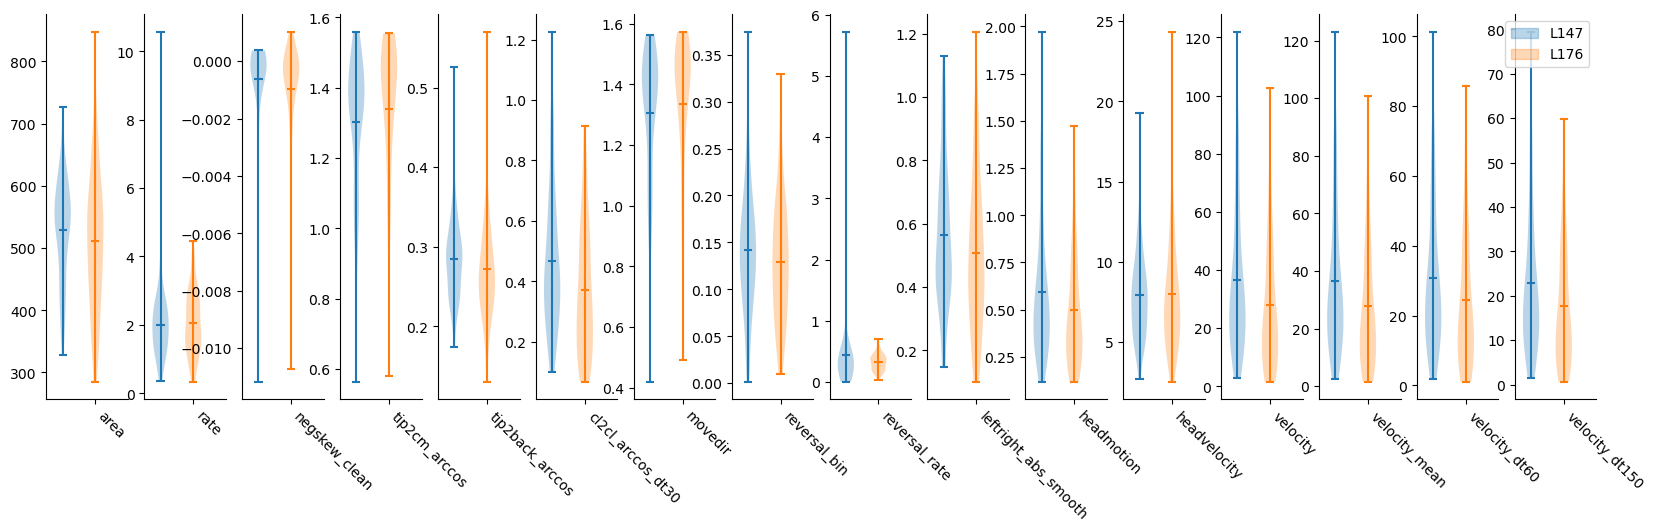

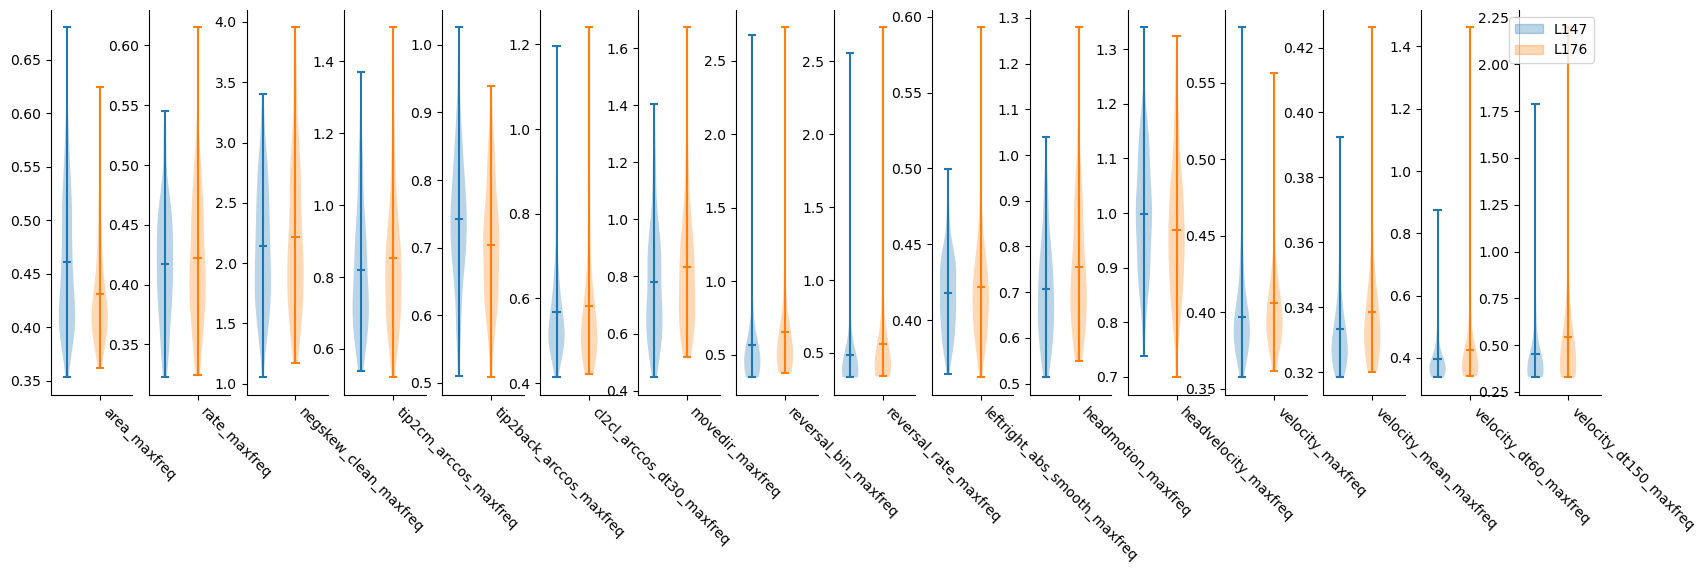

In [8]:
import matplotlib.patches as mpatches
for ftype, f_cols in {'Base': df_basecols, 'Maxfreq':df_maxfreqcols}.items():
    fig, axs = plt.subplots(1, len(f_cols), figsize=(20,5))
    labels = []
    for j, pat in enumerate(['L147', 'L176']):
        for i, col in enumerate(f_cols):
            violin = axs[i].violinplot(all_cond_mean.iloc[all_cond_mean.index.get_level_values(0) == pat][col].dropna(), positions=[j], showmeans=True)
            axs[i].set_xticks([1])
            axs[i].set_xticklabels([col], rotation=-45, ha='left')
            axs[i].spines['top'].set_visible(False)
            axs[i].spines['right'].set_visible(False)
            axs[i].set_xlim(-.5,2)
        labels.append((mpatches.Patch(color = violin["bodies"][0].get_facecolor()[0]), pat))
    plt.legend(*zip(*labels))
    plt.savefig(os.path.join('/gpfs/soma_fs/home/boeger/PpaPred/temp/', f'feature{ftype}_violin.png'))
    plt.show()

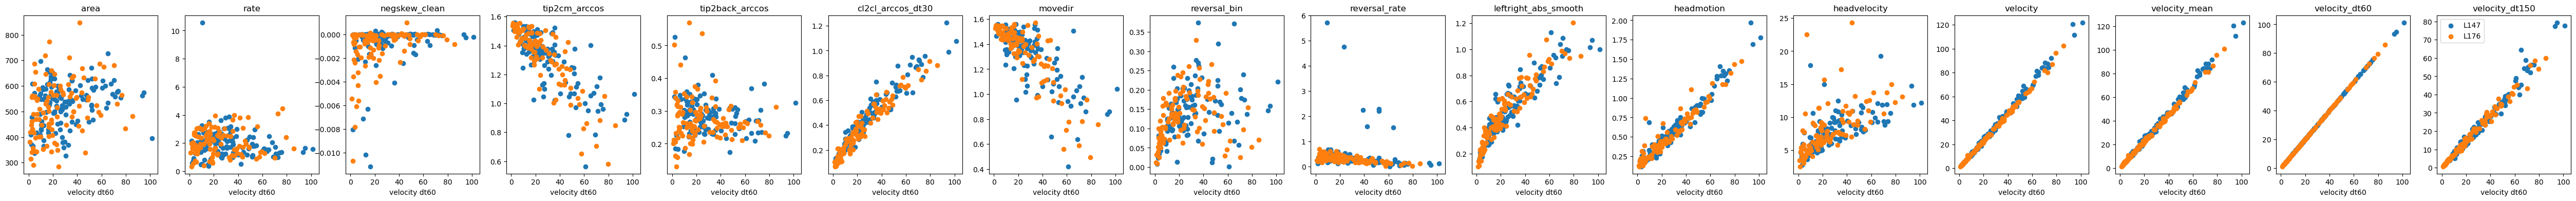

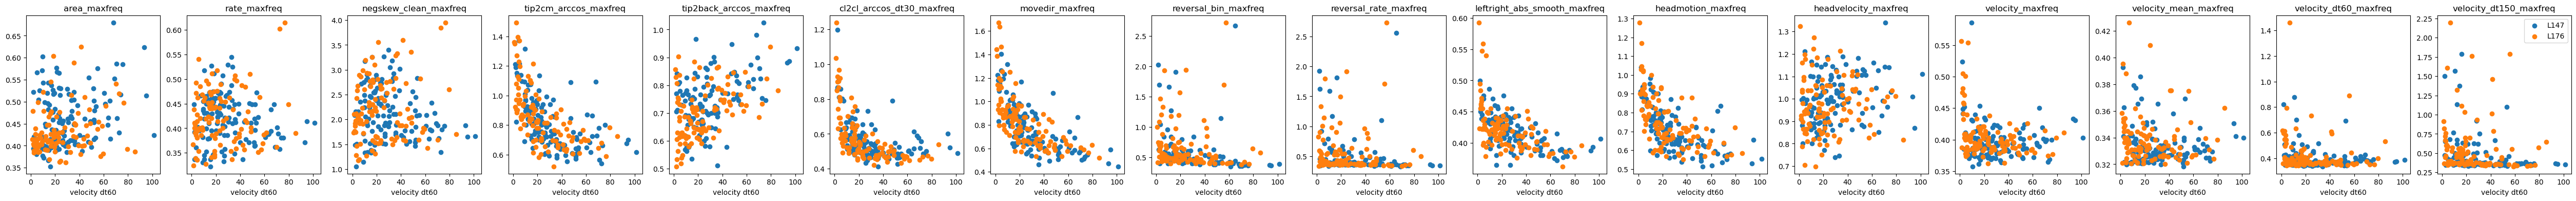

In [9]:
for ftype, f_cols in {'Base': df_basecols, 'Maxfreq':df_maxfreqcols}.items():
    fig, axs = plt.subplots(1, len(f_cols), figsize=(4*len(f_cols),4), sharex=True)
    for i, col in enumerate(f_cols):
        for j, pat in enumerate(['L147', 'L176']):
            _df = all_cond_mean.iloc[all_cond_mean.index.get_level_values(0) == pat]
            axs[i].scatter(_df['velocity_dt60'], _df[col], label=pat)
            axs[i].set_xlabel('velocity dt60')
            axs[i].set_title(col)
    plt.legend()
    plt.savefig(os.path.join('/gpfs/soma_fs/home/boeger/PpaPred/temp/', f'feature{ftype}_veloCorr_mean.png'))
    plt.show()

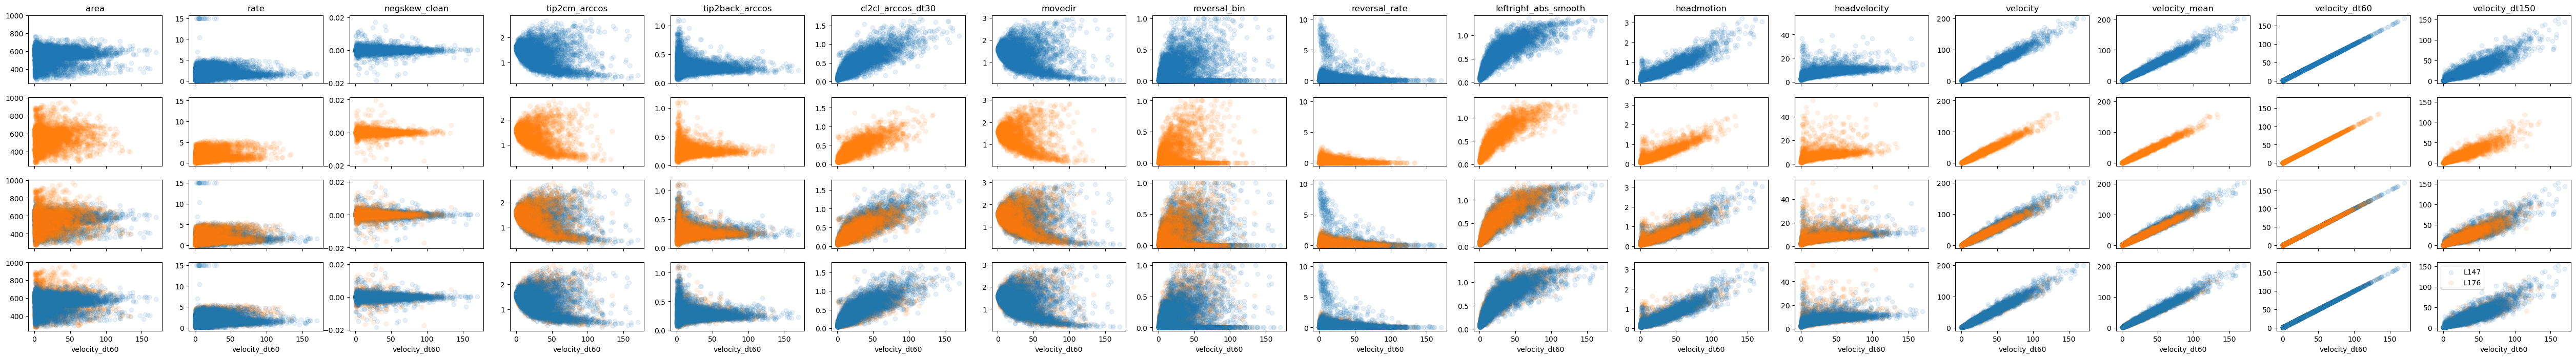

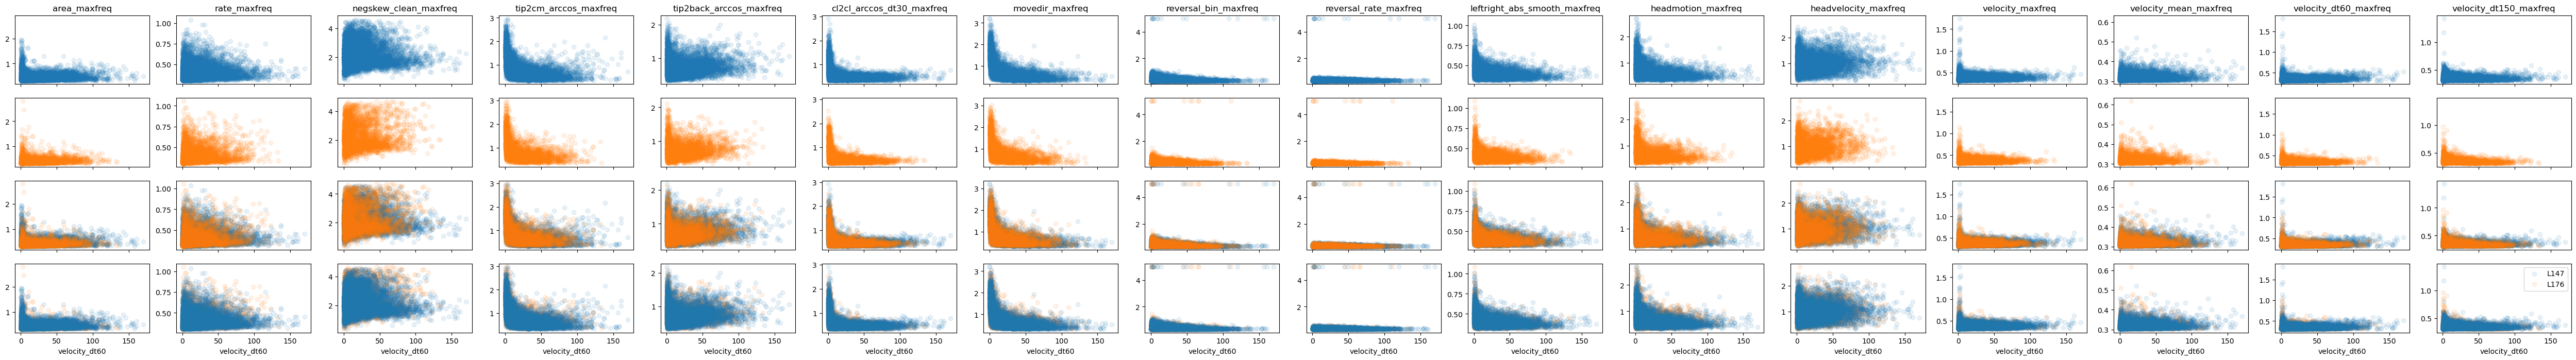

In [13]:
for ftype, f_cols in {'Base': df_basecols, 'Maxfreq':df_maxfreqcols}.items():
    fig, axs = plt.subplots(4, len(f_cols), figsize=(4*len(f_cols),8), sharex=True, sharey='col')
    _color = ['tab:blue', 'tab:orange']
    for i, col in enumerate(f_cols):
        for j, pat in enumerate(['L147', 'L176']):
            _df = all_cond.iloc[all_cond.index.get_level_values(0) == pat]
            axs[j,i].scatter(_df['velocity_dt60'], _df[col], alpha=.1, label=pat, c=_color[j])
            axs[2,i].scatter(_df['velocity_dt60'], _df[col], alpha=.1, label=pat, c=_color[j])
            axs[3,i].scatter(_df['velocity_dt60'], _df[col], alpha=.1, label=pat, c=_color[j], zorder=2-j)
        axs[-1,i].set_xlabel('velocity_dt60')
        axs[0,i].set_title(col)
    plt.legend()
    plt.savefig(os.path.join('/gpfs/soma_fs/home/boeger/PpaPred/temp/', f'feature{ftype}_veloCorr_5secRes.png'))
    plt.show()

In [107]:
count = 0
for k, CL in CLines.items():
    XY = XYs[k]
    PG = pd.read_json(all_engine[k.split('.')[0]+'_features.json'], orient='split')
    if count == 8:
        break
    count += 1

In [124]:
adjustCL = (CL-np.nanmean(CL)) + np.repeat(XY.reshape(XY.shape[0],1, XY.shape[1]), CL.shape[1], axis=1)
# nosetip vs cm over time
_, tip2cm_arccos, _ = al.AngleLen(adjustCL, XY, hypotenuse = "v1", over="space", v1_args=dict(diffindex=[5,0]))
# anterior vs posterior part
_, tip2back_arccos, _ = al.AngleLen(adjustCL, adjustCL, hypotenuse = "v1", over="space", v2_over='space', v1_args=dict(diffindex=[40,10]),v2_args=dict(diffindex=[-10,60]))
# cm vs cm over time
_, cl2cl_arccos_dt30, _ = al.AngleLen(adjustCL, hypotenuse = "v1", over="space", v1_args=dict(diffindex=[-10,10]), v2_diff=30)

# pharynx vs cm over time
_, movedir, _ = al.AngleLen(adjustCL, XY, hypotenuse = "v1", over='space', v1_args=dict(diffindex=[-10,10]))
reversal_bin = np.where(pd.DataFrame(movedir).rolling(10).mean() >= np.deg2rad(120), 1, 0)
reversal_events = np.clip(np.diff(reversal_bin, axis=0), 0, 1)
reversal_rate = pd.Series(reversal_events.squeeze()).rolling(30, center=True).apply(lambda w: np.mean(w)*30)

# assume that v2 (cm vector) is hypotenuse, makes sideways headmotion vector more realistic
# pharynx vs cm over time, with sin calculated
headmotion, leftright, _ = al.AngleLen(adjustCL, XY, hypotenuse = "v2", over='space', v2_args=dict(diff_step=1), angletype=np.arcsin)
headvelocity = abs(headmotion[:-1] - headmotion[1:])/(1/30)
leftright_abs_smooth = abs(pd.DataFrame(leftright).rolling(30).mean())


In [109]:
PG.columns

Index(['area', 'rate', 'negskew_clean', 'tip2cm_arccos', 'tip2back_arccos',
       'cl2cl_arccos_dt30', 'movedir', 'reversal_bin', 'reversal_rate',
       'headmotion', 'leftright_abs_smooth', 'velocity', 'velocity_mean',
       'velocity_dt60', 'velocity_dt150', 'area_maxfreq', 'rate_maxfreq',
       'negskew_clean_cwt0.30', 'negskew_clean_cwt0.82',
       'negskew_clean_cwt1.34', 'negskew_clean_cwt1.87',
       'negskew_clean_cwt2.39', 'negskew_clean_cwt2.91',
       'negskew_clean_cwt3.43', 'negskew_clean_cwt3.96',
       'negskew_clean_cwt4.48', 'negskew_clean_cwt5.00',
       'negskew_clean_maxfreq', 'tip2cm_arccos_maxfreq',
       'tip2back_arccos_maxfreq', 'cl2cl_arccos_dt30_maxfreq',
       'movedir_maxfreq', 'reversal_bin_maxfreq', 'reversal_rate_maxfreq',
       'headmotion_maxfreq', 'leftright_abs_smooth_maxfreq',
       'velocity_maxfreq', 'velocity_mean_maxfreq', 'velocity_dt60_cwt5.00',
       'velocity_dt60_cwt1.82', 'velocity_dt60_cwt1.12',
       'velocity_dt60_cwt0.80

In [110]:
def CLtrajectory_plotter(CLine, XY, cluster_color=['k'], cluster_label=[0], y = None, fn='', figsize=(10,10)):
    fig, ax = plt.subplots(figsize=figsize)
    
    adjustCL = (CLine-np.nanmean(CLine))+np.repeat(XY.reshape(XY.shape[0],1,XY.shape[1]), CLine.shape[1], axis=1)# fits better than subtracting 50
    adjustXY = XY-np.nanmean(XY, axis=0)
    if y is not None:
        legend_elements = [Line2D([0], [0],color=cluster_color[i], label=cluster_label [i]) for i in cluster_label]
        for l in np.unique(y).astype(int):
            il = np.where(y == l)[0]
            ax.plot(*adjustCL[il].T, c=cluster_color[l], alpha = 0.1)
        ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1,1))
    else:
        ax.plot(*adjustCL.T, c=cluster_color[0], alpha = 0.1)
    ax.set_title(fn)
    ax.axis('equal')
    return fig

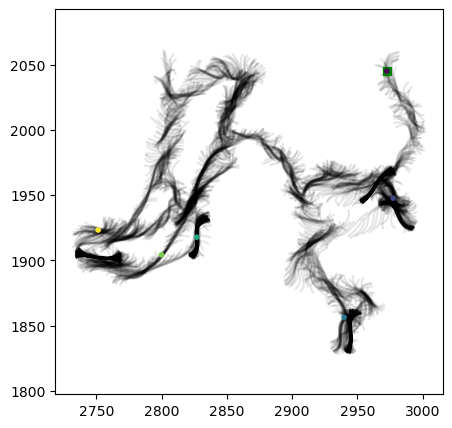

In [111]:
CLtrajectory_plotter(CL, XY, figsize=(5,5));
plt.scatter(*pd.DataFrame(XY).dropna().iloc[0], marker='s', c='green', zorder=5)
plt.scatter(XY[::500,0],XY[::500,1], marker='.', c=range(len(XY[::500,0])), cmap='viridis', zorder=5)
plt.axis('equal')
plt.show();

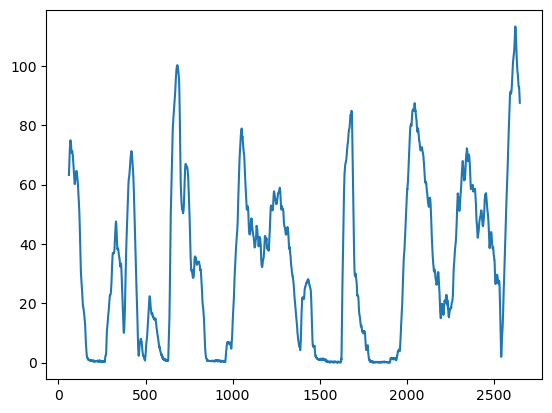

In [171]:
plt.plot(PG.velocity_dt60)
plt.show();

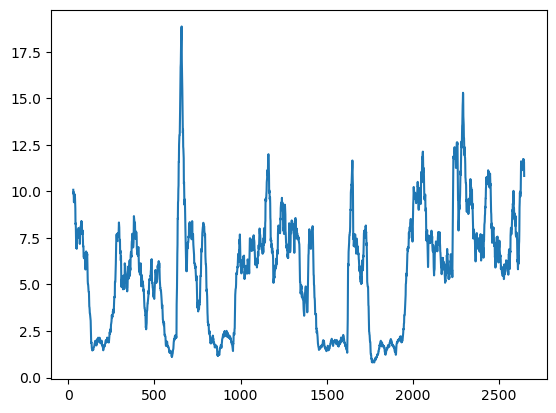

In [127]:
plt.plot(pd.DataFrame(headvelocity).rolling(30).mean())
#plt.plot(PG.reversal_bin)
plt.show();

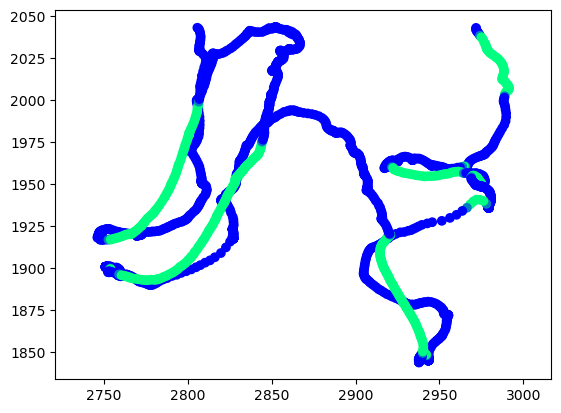

In [168]:
cmap = plt.get_cmap('winter')
line_colors = cmap(pd.DataFrame(reversal_bin).rolling(2).mean())
plt.scatter(XY[-len(pd.DataFrame(reversal_bin)):,0], XY[-len(pd.DataFrame(reversal_bin)):,1], c=line_colors)
plt.axis('equal')
plt.show();

In [981]:
def unitvector(xyarray, diff_step = 1):
    """
    Computes unit vectors and vector lengths from a 2D array of coordinates.
    
    Args:
        xyarray (np.ndarray): Input array of 2D coordinates (shape: [n_points, 2]).
    
    Returns:
        tuple: A tuple containing:
            - unit_vec (np.ndarray): Unit vectors corresponding to each coordinate.
            - vlen (np.ndarray): Vector lengths for each coordinate.
            - base (np.ndarray): Differences between consecutive coordinates.
    """
    base = xyarray[diff_step:] - xyarray[:-diff_step]
    vlen = np.linalg.norm(base, axis = 1).reshape(base.shape[0],1)
    unit_vec = np.divide(base,vlen)
    unit_vec = np.nan_to_num(unit_vec)
    return unit_vec, vlen/diff_step, base

def unitvector_space(xyarray, diffindex=[0,-1]):
    """
    Computes unit vectors and vector lengths for a given array of 2D points at a defined index.

    Args:
        xyarray (numpy.ndarray): A 2D array containing point coordinates.
        diffindex (list, optional): Indices for points to compute base vector from (default: [0, -1]).

    Returns:
        numpy.ndarray: Array of unit vectors.
        numpy.ndarray: Array of vector lengths.
        numpy.ndarray: Base vectors.
    """
    base = xyarray[:,diffindex[1]]-xyarray[:,diffindex[0]]
    vlen = np.linalg.norm(base, axis = 1).reshape(base.shape[0],1)
    unit_vec = np.divide(base,vlen)
    unit_vec = np.nan_to_num(unit_vec)
    return unit_vec, vlen, base


def AngleLen (v1, v2=None, hypotenuse = "v1", over="frames", v2_over = 'frames', v1_args={}, v2_args={}, v2_diff = 1, angletype=np.arccos):
    """
    Computes the length of the difference vector and the angle between two vectors.

    Args:
        v1 (numpy.ndarray): First vector (with 2D coordinates).
        v2 (numpy.ndarray, optional): Second vector (default: None).
        hypotenuse (str, optional): Determines which vector's length to use as the hypotenuse (default: "v1").
        over (str, optional): Specifies whether to compute over "frames" or "space" (default: "frames").
        **args: Additional arguments for unit vector computation, only applicable if over = "space".

    Returns:
        numpy.ndarray: Length of the difference vector.
        numpy.ndarray: Angle (in radians) between v1 and v2.
        numpy.ndarray: Difference vector (base vector).
    """
    func_dict = {'frames': unitvector,
                 'space': unitvector_space}
    
    v1_unitfunc = func_dict[over]
    v2_unitfunc = func_dict[v2_over]  
    v1_unit, v1_len, v1_diff = v1_unitfunc(v1,**v1_args)
    if not v2 is None:
        v2_unit, v2_len, v1_diff = v2_unitfunc(v2, **v2_args)
    else:
        v2_unit, v2_len, v1_diff = v1_unit[v2_diff:], v1_len[v2_diff:], v1_diff[v2_diff:]
    
    hyp = {"v1":v1_len, "v2":v2_len}
    hypo_len = hyp[hypotenuse]
    adjecent_len = hyp[[k for k in hyp.keys() if k != hypotenuse][0]]
    
    crop = min(len(v1_unit), len(v2_unit))
    
    dotProduct = v1_unit[:crop,0]*v2_unit[:crop,0] +v1_unit[:crop,1]*v2_unit[:crop,1]
    arccos = angletype(dotProduct) # mod of Vector is 1, so /mod can be left away  #arccos
    
    opposite_len = np.multiply(hypo_len[:crop].flatten(), abs(np.sin(arccos[:crop]))) #
    
    return opposite_len, arccos, v1_diff